# <font color='yellow'> Business Case </font>

The primary objective of this project is to develop a predictive model capable of assessing the level of damage a building may suffer during an earthquake in Nepal. This information is crucial for effective disaster management, enabling informed decision-making regarding resource allocation, rescue efforts, and long-term recovery planning. By analyzing building characteristics, earthquake parameters, and damage assessment data from the 2015 Nepal earthquake, we can identify key indicators that influence earthquake vulnerability.

The predictive model will be trained on this data to learn patterns and correlations between building attributes and damage levels. This knowledge can be used to assess the risk of damage for future earthquakes and inform decision-making regarding building codes, construction practices, and emergency response plans. Additionally, the model can be used to identify vulnerable buildings and prioritize mitigation efforts, reducing the potential for loss of life and property damage in future earthquakes.

# <font color='yellow'> Domain Analysis </font>

The primary objective of this project is to develop a predictive model capable of assessing the level of damage a building may suffer during an earthquake in Nepal. This information is crucial for effective disaster management, enabling informed decision-making regarding resource allocation, rescue efforts, and long-term recovery planning.

Domain Context:

Earthquake Vulnerability: Buildings in Nepal are susceptible to earthquake damage due to factors such as seismic activity, building construction practices, and geographical location.
Disaster Management: Accurate prediction of building damage can help prioritize rescue efforts, allocate resources effectively, and inform long-term recovery planning.
Decision Making: The model can provide valuable insights for policymakers, engineers, and emergency responders to make informed decisions regarding building codes, construction practices, and disaster preparedness.
Key Questions:

What factors contribute to earthquake vulnerability in buildings?
How can we accurately predict the level of damage a building will suffer in an earthquake?
What are the potential consequences of inaccurate predictions?
How can the model be used to improve disaster management and reduce the impact of earthquakes?
Domain Challenges:

Data Availability: Obtaining reliable and comprehensive data on building characteristics, earthquake parameters, and damage assessment can be challenging.  
Model Complexity: Developing a model that accurately captures the complex interactions between building attributes, earthquake characteristics, and damage levels requires careful consideration of feature engineering and model selection.  
Uncertainty: Earthquakes are unpredictable events, and there is always a degree of uncertainty in predicting damage.


Importing the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1=pd.read_csv('train_values.csv')
df1

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df2=pd.read_csv('train_labels.csv')
df2

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


# <font color='yellow'> Basic Checks </font>

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df3=pd.merge(df1,df2 , on='building_id' , how='left')
df3

# Joining train_values and train_labels dataset 

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [7]:
df3 = df3.sample(frac=0.3, random_state=42)
df3
# As data set is too big that our system cant handel it , so requcing the data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
111801,1023112,10,1224,11128,1,20,7,3,t,r,n,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
91817,64407,22,1101,12483,2,60,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
251661,967834,26,39,11440,2,50,6,5,t,r,n,v,q,s,d,0,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
205479,36669,8,1073,2743,3,50,7,6,o,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
22618,242842,6,706,7959,2,15,8,4,t,r,n,f,x,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,677457,4,1342,5825,2,10,6,5,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
17267,461420,7,322,2843,2,10,6,6,t,r,n,f,q,s,d,1,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
66715,873677,0,540,2361,2,20,7,5,t,r,n,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
243127,836193,11,155,12428,2,45,8,8,t,r,n,f,x,s,d,0,1,1,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78180 entries, 111801 to 2108
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             78180 non-null  int64 
 1   geo_level_1_id                          78180 non-null  int64 
 2   geo_level_2_id                          78180 non-null  int64 
 3   geo_level_3_id                          78180 non-null  int64 
 4   count_floors_pre_eq                     78180 non-null  int64 
 5   age                                     78180 non-null  int64 
 6   area_percentage                         78180 non-null  int64 
 7   height_percentage                       78180 non-null  int64 
 8   land_surface_condition                  78180 non-null  object
 9   foundation_type                         78180 non-null  object
 10  roof_type                               78180 non-null  object
 11  gro

In [9]:
df3.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,7.818000e+04,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000,78180.000000
mean,5.263599e+05,13.926541,699.793937,6251.635405,2.130379,26.818240,8.040266,5.438974,0.088667,0.762510,0.034241,0.018048,0.067626,0.075352,0.254362,0.083384,0.043515,0.016142,0.014582,0.983615,0.112394,0.064032,0.034369,0.008455,0.000793,0.000435,0.000895,0.000166,0.000153,0.000153,0.004912,2.237465
std,3.043798e+05,8.058564,413.158716,3642.043579,0.726139,75.733002,4.391960,1.920642,0.284265,0.425548,0.181850,0.133126,0.251105,0.263960,0.435505,0.276464,0.204015,0.126023,0.119872,0.419226,0.315853,0.244811,0.182177,0.091561,0.028150,0.020850,0.029910,0.012894,0.012388,0.012388,0.069912,0.612804
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.614785e+05,7.000000,348.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.254280e+05,12.000000,699.000000,6267.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.914525e+05,21.000000,1049.000000,9393.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052911e+06,30.000000,1426.000000,12565.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
df3.describe(include='O')

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,78180,78180,78180,78180,78180,78180,78180,78180
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,65075,65741,54745,62793,49625,60618,74980,75263


In [11]:
df3=df3.rename(columns={'building_id':'building_id', 'geo_level_1_id':'geo_1', 'geo_level_2_id':'geo_2', 'geo_level_3_id':'geo_3',
       'count_floors_pre_eq':'no_floor', 'age':'age', 'area_percentage':'area', 'height_percentage':'height',
       'land_surface_condition':'land_condition', 'foundation_type':'foundation_type', 'roof_type':'roof_type',
       'ground_floor_type':'ground_type', 'other_floor_type':'other_floor', 'position':'position',
       'plan_configuration':'plan_configuration', 'has_superstructure_adobe_mud':'has_adobe_mud',
       'has_superstructure_mud_mortar_stone':'has_mortal_stone', 'has_superstructure_stone_flag':'has_stone',
       'has_superstructure_cement_mortar_stone':'has_cement',
       'has_superstructure_mud_mortar_brick':'has_mud_brick',
       'has_superstructure_cement_mortar_brick':'has_cement_brick', 'has_superstructure_timber':'has_timber',
       'has_superstructure_bamboo':'has_bamboo', 'has_superstructure_rc_non_engineered':'non_engineered',
       'has_superstructure_rc_engineered':'engineered', 'has_superstructure_other':'has_other_material',
       'legal_ownership_status':'legal_ownership', 'count_families':'count_families', 'has_secondary_use':'secondary_use',
       'has_secondary_use_agriculture':'use_agriculture', 'has_secondary_use_hotel':'use_hotel',
       'has_secondary_use_rental':'use_rental', 'has_secondary_use_institution':'use_institution',
       'has_secondary_use_school':'use_school', 'has_secondary_use_industry':'use_industry',
       'has_secondary_use_health_post':'use_health', 'has_secondary_use_gov_office':'use_office',
       'has_secondary_use_use_police':'use_police', 'has_secondary_use_other':'use_other',
       'damage_grade':'damage_grade'})
df3

,building_id,geo_1,geo_2,geo_3,no_floor,age,area,height,land_condition,foundation_type,roof_type,ground_type,other_floor,position,plan_configuration,has_adobe_mud,has_mortal_stone,has_stone,has_cement,has_mud_brick,has_cement_brick,has_timber,has_bamboo,non_engineered,engineered,has_other_material,legal_ownership,count_families,secondary_use,use_agriculture,use_hotel,use_rental,use_institution,use_school,use_industry,use_health,use_office,use_police,use_other,damage_grade
111801,1023112,10,1224,11128,1,20,7,3,t,r,n,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
91817,64407,22,1101,12483,2,60,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
251661,967834,26,39,11440,2,50,6,5,t,r,n,v,q,s,d,0,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
205479,36669,8,1073,2743,3,50,7,6,o,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
22618,242842,6,706,7959,2,15,8,4,t,r,n,f,x,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,677457,4,1342,5825,2,10,6,5,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
17267,461420,7,322,2843,2,10,6,6,t,r,n,f,q,s,d,1,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
66715,873677,0,540,2361,2,20,7,5,t,r,n,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
243127,836193,11,155,12428,2,45,8,8,t,r,n,f,x,s,d,0,1,1,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3




geo_1, geo_2, geo_3 &emsp;&emsp; -&emsp;&emsp; region in which building exists, from largest (level 1) to most specific sub-region (level3)     
no_floor &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; -&emsp;&emsp; number of floors in the building before the earthquake              
age&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;-&emsp;&emsp; age of the building in years          
area&emsp; &emsp; &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;-&emsp;&emsp; area of the building footprint      
height &emsp; &emsp; &emsp; &emsp;&emsp; &emsp; &emsp;-&emsp;&emsp; height of the building footprint     
land_condition&emsp; &emsp; &emsp; &emsp;-&emsp;&emsp;  surface condition of the land where the building was built         
foundation_type&emsp; &emsp;&emsp;&emsp;-&emsp;&emsp; type of foundation used while building        
roof_type &emsp; &emsp; &emsp; &emsp; &emsp;&emsp;-&emsp;&emsp; type of roof used while building           
ground_type &emsp; &emsp;&emsp;&emsp;&emsp; -&emsp;&emsp; type of the ground floor              
other_floor &emsp; &emsp; &emsp; &emsp; &emsp; -&emsp;&emsp; type of constructions used in higher than the ground floors             
position &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; -&emsp;&emsp; position of the building              
plan_configuration&emsp;&emsp; &emsp;-&emsp;&emsp; building plan configuration             
has_adobe_mud&emsp;&emsp;&emsp;&emsp; -&emsp;&emsp; indicates if the superstructure was made of Adobe/Mud.                 
has_mortal_stone &emsp; &emsp; &emsp;-&emsp;&emsp; indicates if the superstructure was made of Mud Mortar - Stone     
has_stone &emsp; &emsp; &emsp; &emsp;&emsp;&emsp;-&emsp;&emsp; indicates if the superstructure was made of Stone        
has_cement&emsp; &emsp; &emsp; &emsp; &emsp; -&emsp;&emsp; indicates if the superstructure was made of Cement Mortar - Stone                  
has_mud_brick &emsp; &emsp;&emsp; &emsp; -&emsp;&emsp; indicates if the superstructure was made of Mud Mortar - Brick.                 
has_cement_brick  &emsp; &emsp; &emsp;-&emsp;&emsp; indicates if the superstructure was made of Cement Mortar - Brick.                 
has_timber &emsp;&emsp; &emsp;&emsp;&emsp;&emsp; -&emsp;&emsp;indicates if the superstructure was made of Timber                 
has_bamboo &emsp; &emsp; &emsp; &emsp;&emsp;-&emsp;&emsp; indicates if the superstructure was made of Bamboo.                       
non_engineered  &emsp;&emsp;&emsp;&emsp; -&emsp;&emsp; indicates if the superstructure was made of non-engineered reinforced concrete                   
engineered &emsp; &emsp; &emsp; &emsp; &emsp; -&emsp;&emsp; indicates if the superstructure was made of engineered reinforced concrete                  
has_other_material&emsp; &emsp; &emsp;-&emsp;&emsp; indicates if the superstructure was made of any other material                             
legal_ownership &emsp; &emsp;&emsp;&emsp; -&emsp;&emsp; legal ownership status of the land where building was built                            
count_families &emsp; &emsp;&emsp;&emsp;&emsp;-&emsp;&emsp; number of families that live in the building                             
secondary_use &emsp; &emsp; &emsp; &emsp; -&emsp;&emsp; indicates if the building was used for any secondary purpose                           
use_agriculture &emsp;&emsp; &emsp; &emsp; -&emsp;&emsp; indicates if the building was used for agricultural purposes                               
use_hotel &emsp; &emsp;&emsp; &emsp; &emsp; &emsp; -&emsp;&emsp; indicates if the building was used as a hotel                               
use_rental &emsp;&emsp;&emsp; &emsp; &emsp; &emsp; -&emsp;&emsp; indicates if the building was used for rental purposes                              
use_institution &emsp; &emsp; &emsp; &emsp; -&emsp;&emsp; indicates if the building was used as a location of any institution                           
use_school &emsp;&emsp;&emsp; &emsp; &emsp;&emsp; -&emsp;&emsp; indicates if the building was used as a school                     
use_industry &emsp; &emsp; &emsp; &emsp; &emsp;-&emsp;&emsp; indicates if the building was used for industrial purposes                   
use_health &emsp; &emsp; &emsp;&emsp;&emsp; &emsp;-&emsp;&emsp; indicates if the building was used as a health post                      
use_office &emsp; &emsp;&emsp; &emsp; &emsp;&emsp; -&emsp;&emsp; indicates if the building was used fas a government office                         
use_police &emsp; &emsp;&emsp;&emsp; &emsp; &emsp;-&emsp;&emsp; indicates if the building was used as a police station                     
use_other &emsp; &emsp; &emsp; &emsp;&emsp;&emsp; -&emsp;&emsp; indicates if the building was secondarily used for other purposes                    
damage_grade &emsp; &emsp; &emsp; &emsp; - &emsp;&emsp; represents a level of damage to the building . 1-represents low damage , 2- represents a medium amount of damag, -3 represents almost complete destruction                         

#### Categorical Data - 

In [12]:
df_cat1=(['land_condition', 'foundation_type' , 'no_floor' , 'roof_type' , 'ground_type' , 'other_floor' , 'position' , 'plan_configuration' ,
'has_adobe_mud' ,'has_mortal_stone' ,'has_stone' ,'has_cement' , 'has_mud_brick' , 'has_cement_brick' , 'has_timber' , 'has_bamboo' , 
'non_engineered' , 'engineered' ,'has_other_material' , 'legal_ownership' , 'count_families' , 'secondary_use' , 'use_agriculture' , 'use_hotel' ,
'use_rental' , 'use_institution', 'use_school' , 'use_industry' , 'use_health' , 'use_office' , 'use_police' , 'use_other'])

#### Continuous Data -   


In [13]:
df_num1=(['geo_1' , 'geo_2'  , 'geo_3' , 'age' , 'area' , 'height']) 

In [14]:
df_cat=df3[df_cat1]

df_num=df3[df_num1]

In [15]:
df_cat

,land_condition,foundation_type,no_floor,roof_type,ground_type,other_floor,position,plan_configuration,has_adobe_mud,has_mortal_stone,has_stone,has_cement,has_mud_brick,has_cement_brick,has_timber,has_bamboo,non_engineered,engineered,has_other_material,legal_ownership,count_families,secondary_use,use_agriculture,use_hotel,use_rental,use_institution,use_school,use_industry,use_health,use_office,use_police,use_other
111801,t,r,1,n,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
91817,t,r,2,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
251661,t,r,2,n,v,q,s,d,0,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
205479,o,r,3,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
22618,t,r,2,n,f,x,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,t,r,2,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
17267,t,r,2,n,f,q,s,d,1,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
66715,t,r,2,n,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
243127,t,r,2,n,f,x,s,d,0,1,1,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df_num

,geo_1,geo_2,geo_3,age,area,height
111801,10,1224,11128,20,7,3
91817,22,1101,12483,60,7,6
251661,26,39,11440,50,6,5
205479,8,1073,2743,50,7,6
22618,6,706,7959,15,8,4
...,...,...,...,...,...,...
2783,4,1342,5825,10,6,5
17267,7,322,2843,10,6,6
66715,0,540,2361,20,7,5
243127,11,155,12428,45,8,8


# <font color='yellow'> EDA </font>

### <font color='yellow'> Univarite analysis </font>
##### <font color='red'>For  Continuous Data </font>

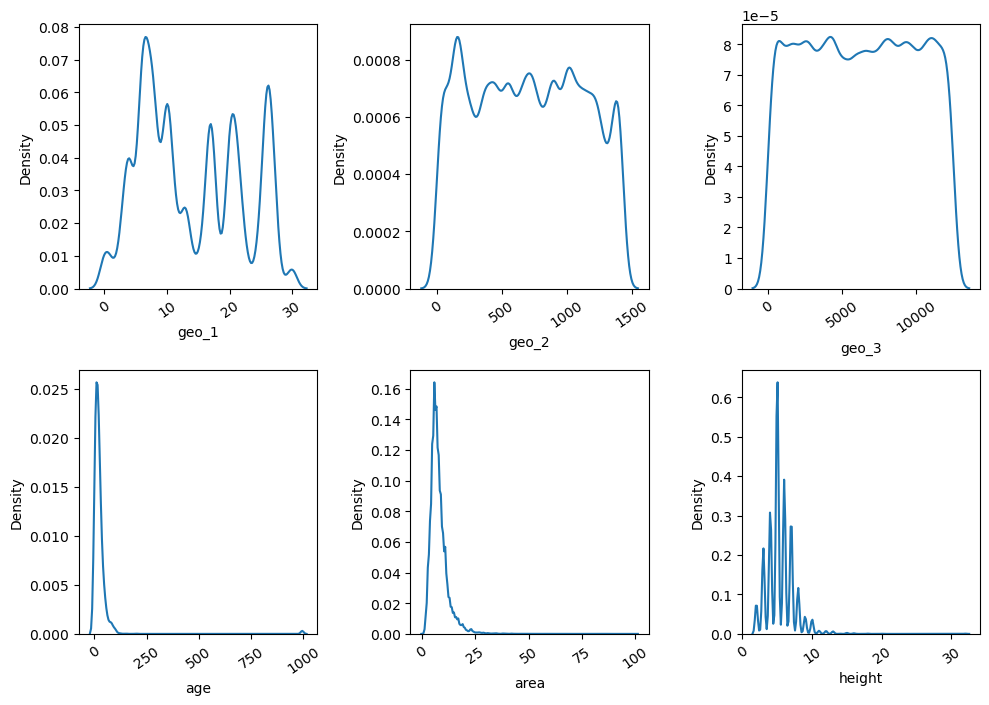

In [17]:
plt.figure(figsize=(10,10))
plotnumber=1
for i in df_num:
    plt.subplot(3,3,plotnumber)
    sns.kdeplot(x=df_num[i])
    plt.xticks(rotation=35)
    plotnumber=plotnumber+1
    plt.tight_layout()

# here we draw a density plot , A density plot provides a smooth representation of a probability distribution, offering a more - 
    # continuous view of the data's shape compared to a histogram

### Insights

##### Geo_1: (Largest Region):
   * The density plot appears to be bimodal, suggesting that there might be two distinct groups of regions within geo_1 with different levels of earthquake damage.
   * The peaks of the distribution are relatively high, indicating that a significant portion of the data points fall within these regions.  
##### Geo_2: (Intermediate Region):  
   * The density plot is skewed to the right, indicating that there are more regions within geo_2 with higher levels of earthquake damage.
   * The peak of the distribution is lower than that of geo_1, suggesting a wider spread of damage levels within geo_2.  
##### Geo_3: (Smallest Region):  
   * The density plot is relatively flat, suggesting a more uniform distribution of earthquake damage across geo_3 regions.
   * The peak of the distribution is the lowest among the three, indicating a wider spread of damage levels.  
##### Age:  
   * The density plot is highly skewed to the right, indicating that there are more older buildings in the dataset.
   * The peak of the distribution is on the lower end, suggesting that most buildings are relatively young.  
##### Area:  
   * The density plot is also skewed to the right, but to a lesser extent than age. This suggests that there are some larger buildings, but most are of moderate size.
   * The peak of the distribution is around the middle, indicating that the majority of buildings have a moderate area.  
##### Height:  
   * The density plot is relatively symmetric, with a peak around the middle. This suggests that there is a fairly even distribution of building heights.
   * There are some taller buildings, but the majority have a moderate height.         

### <font color='yellow'> Univarite analysis </font>
##### <font color='red'>For  Categorical Data </font>

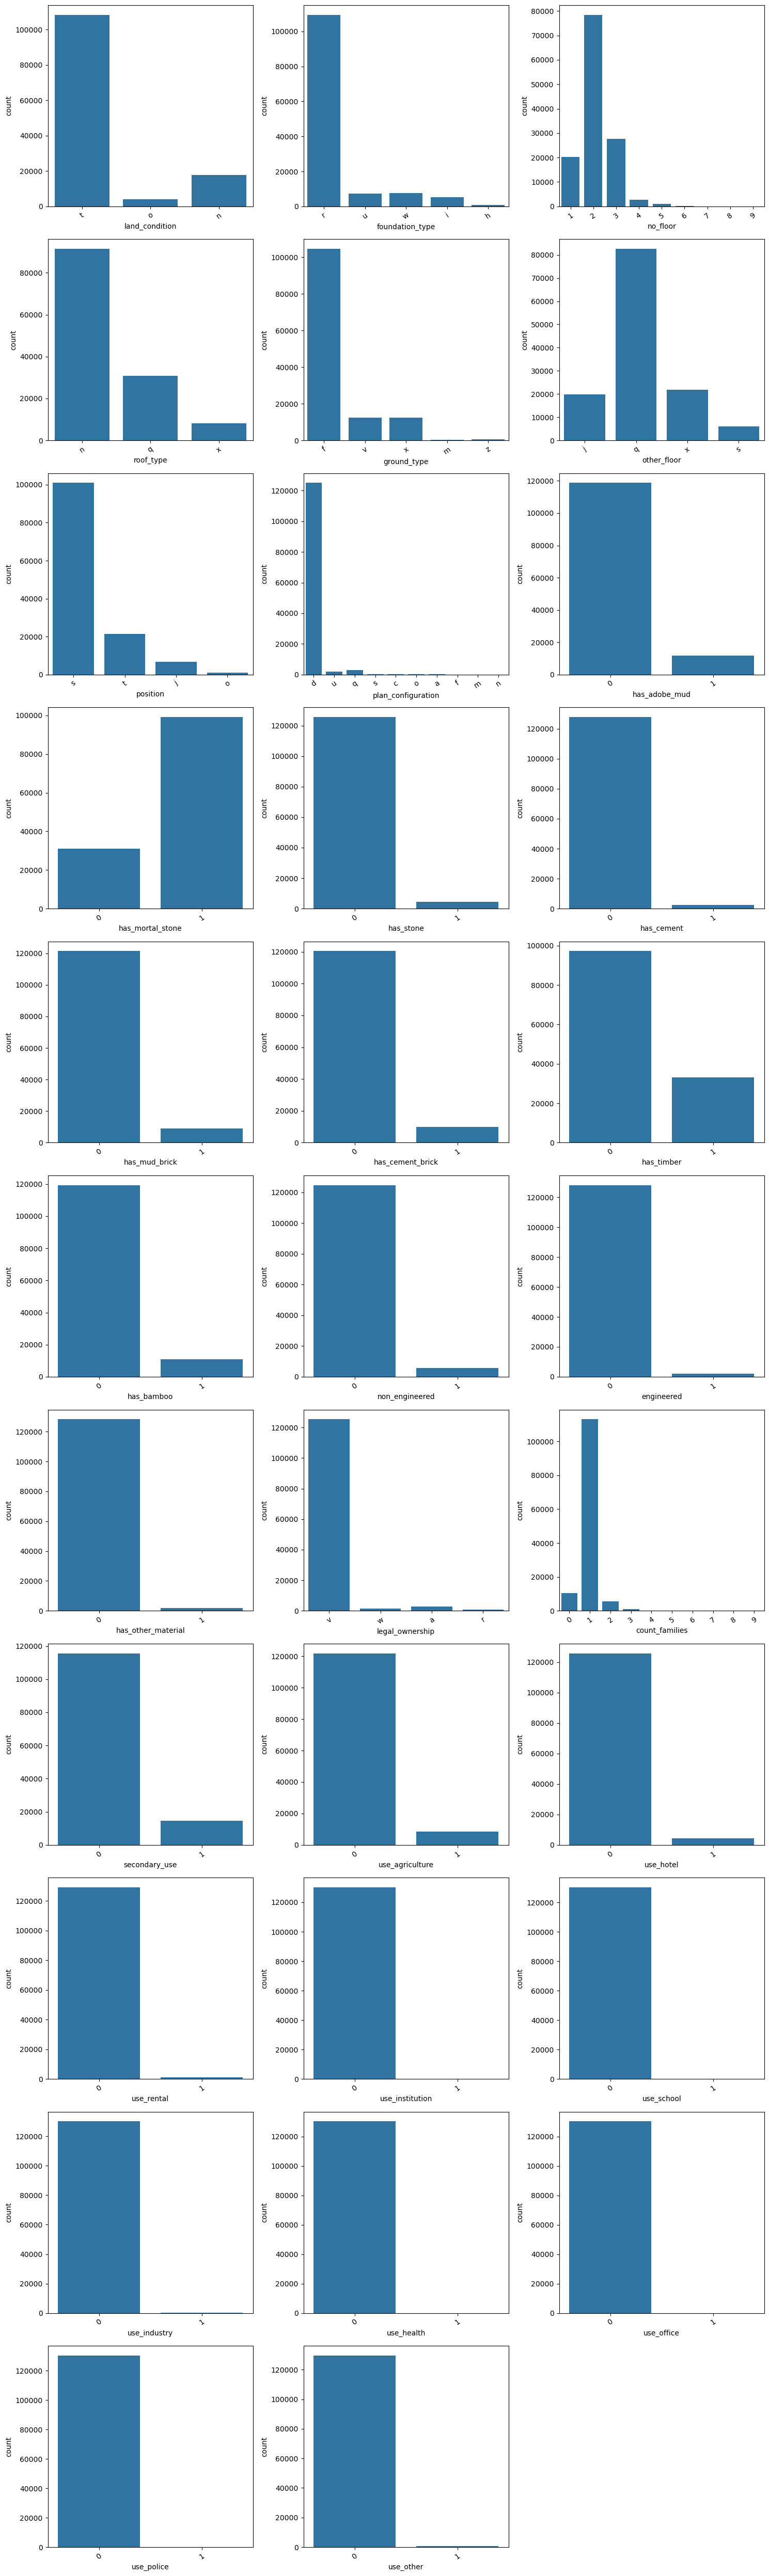

In [19]:
plt.figure(figsize=(15,50))
plotnumber=1
for i in df_cat:
    plt.subplot(11,3,plotnumber)
    sns.countplot(x=df_cat[i])
    plt.xticks(rotation=35)
    plotnumber=plotnumber+1
    plt.tight_layout()
plt.show()    


### Insights-  
#### Land Condition:  
The majority of buildings are built on terrain with a "t" condition (83.2%), followed by "n" (13.6%), and very few are on "o" condition (3.2%).  

#### Foundation Type:  
Most buildings have a foundation type "r" (84.1%), while the rest have types "w" (5.8%), "u" (5.5%), and fewer have "i" (4.1%) and "h" (0.6%).  

#### Number of Floors (no_floor):  
The majority of buildings have 2 floors (60.1%). Other common configurations include 3 floors (21.3%) and 1 floor (15.5%). Buildings with 4 or more floors are rare.  

#### Roof Type:  
The most common roof type is "n" (70.2%), followed by "q" (23.6%). Roof type "x" is the least common (6.2%).  

#### Ground Floor Type:  
"f" type ground floor is prevalent (80.4%). Other types include "x" (9.5%), "v" (9.4%), with "z" and "m" being quite rare.  

#### Other Floor Type:  
The most common construction used in higher floors is "q" (63.4%), followed by "x" (16.7%), and "j" (15.3%). "s" is the least common (4.6%).  

#### Position:  
A significant majority of buildings are in position "s" (77.5%), followed by "t" (16.5%), "j" (5.1%), and "o" (0.9%).  

#### Plan Configuration:  
Most buildings have a "d" configuration (96.0%), with very few having other configurations such as "q" (2.2%) or "u" (1.4%).  

### Superstructure Types  
#### Has Adobe Mud (has_adobe_mud):  
About 91.1% of the buildings do not use adobe/mud in their superstructure, while 8.9% do. This suggests adobe/mud is not a common material used in construction in this dataset  

#### Has Mortar Stone (has_mortal_stone):  
A significant portion (76.2%) of buildings use mud mortar stone in their construction, while 23.8% do not. This indicates that mud mortar stone is a common building material.  

#### Has Stone (has_stone):  
Only a small percentage (3.4%) of buildings have stone in their superstructure, meaning stone is rarely used.  

#### Has Cement (has_cement):  
A very small percentage (1.8%) of buildings have cement mortar stone in their superstructure, showing that cement is not commnly used.  

#### Has Mud Brick (has_mud_brick):  
Around 6.8% of buildings use mud mortar brick, indicating it is not a common material compared to mud mortar stone.  

#### Has Cement Brick (has_cement_brick):  
Approximately 7.5% of buildings use cement mortar brick, suggesting it is slightly more common than other cement-based materials.  

#### Has Timber (has_timber):  
About 25.5% of buildings incorporate timber into their superstructure, making it a relatively common material compared to others like adobe/mud or stone.  

#### Has Bamboo (has_bamboo):  
Around 8.5% of buildings have bamboo in their construction, which shows moderate usage of bamboo as a building material.  

#### Non-engineered Reinforced Concrete (non_engineered):  
About 4.3% of the buildings used Non-engineered reinforced concrete, suggesting it is not widely adopted in this dataset.  

#### Engineered Reinforced Concrete (engineered):  
with only 1.6% of buildings using Engineered reinforced concrete material, indicating it is the least common among the listed materials.  

#### Has Other Material (has_other_material):  
About 1.5% of buildings use other types of materials not specified in the main categories, indicating a minor variety in construction materials.  

### Legal Ownership and Number of Families  
#### Legal Ownership (legal_ownership):  
The majority of buildings have legal ownership status "v" (96.3%), indicating a stable and common legal ownership type. Other types like "a" (2.1%), "w" (1.0%), and "r" (0.6%) are much less common, showing limited diversity in legal ownership statuses.  

#### Number of Families (count_families):  
Most buildings house a single family (86.8%), which suggests that the majority of buildings are single-family residences. Buildings housing two families account for 8.0%, and those with three families make up 4.3%. Buildings housing more than three families are rare, with less than 1% of the total buildings.  

### Secondary Use  
#### Secondary Use (secondary_use):  
A minority of buildings (11.2%) are used for secondary purposes, with most buildings (88.8%) not having any secondary use. This indicates that the majority of buildings serve their primary intended purpos.  

#### Use Agriculture (use_agriculture):  
Around 6.4% of buildings have an agricultural secondary use, indicating agriculture is a common secondary purpose among the buildings with secondary use.

#### Use Hotel (use_hotel):  
About 3.4% of buildings are used as hotels, showing moderate use of buildings for hospitality purposes.  

#### Use Rental (use_rental):  
A very small percentage (0.8%) of buildings are used for rental purposes, indicating that renting is not a common secondary use.  

#### Use Institution (use_institution):
Only 0.1% of buildings are used for institutional purposes, showing that institutions are a rare secondary use case.

#### Use School (use_school):
Even fewer buildings (0.04%) are used as schools, indicating that education is an extremely rare secondary use.

#### Use Industry (use_industry):
A negligible percentage (0.1%) of buildings are used for industrial purposes, suggesting that industry-related usage is very uncommon.

#### Use Health (use_health):
Only 0.02% of buildings serve as health posts, indicating health facilities are very rare as secondary uses.

#### Use Office (use_office):
Similarly, only 0.01% of buildings are used as government offices, showing that this is a very rare secondary use.

#### Use Police (use_police):
A minuscule percentage (0.009%) of buildings are used as police stations, indicating this secondary use is virtually nonexistent.

#### Use Other (use_other):
About 0.5% of buildings have other unspecified secondary uses, indicating a small diversity in secondary use cases.  versity in secondary use cases. h less than 1% of the total buildings.

### <font color='yellow'> Bivarite analysis </font>
##### <font color='red'>For Continious Data </font>

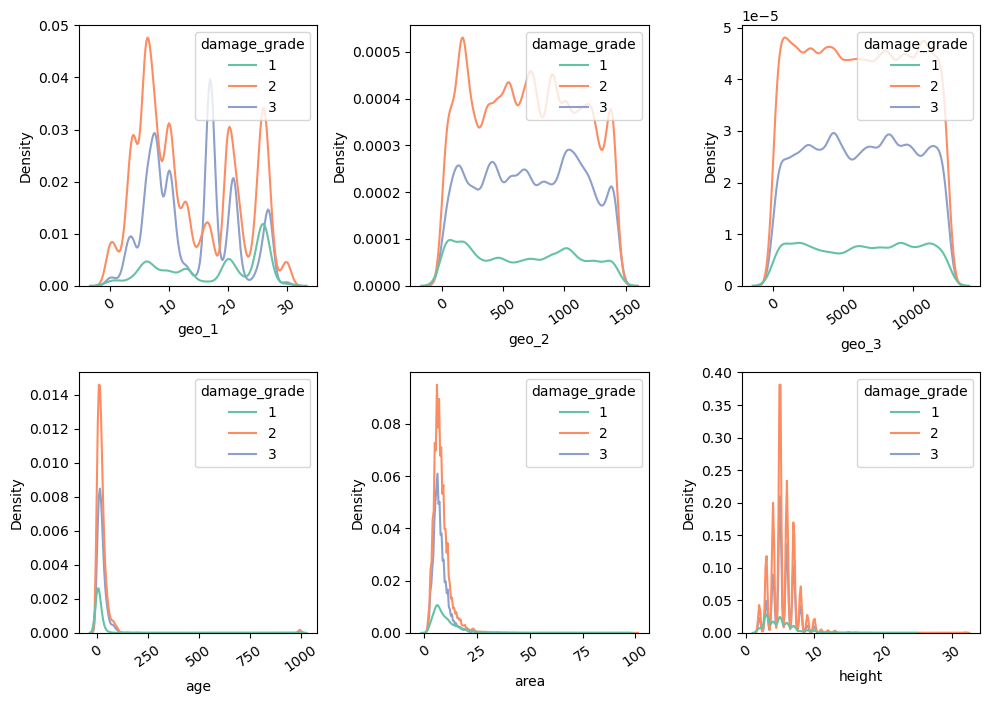

In [20]:
plt.figure(figsize=(10,10))
plotnumber=1
for i in df_num:
    plt.subplot(3,3,plotnumber)
    sns.kdeplot(x=df_num[i],hue=df3.damage_grade ,palette='Set2')
    plt.xticks(rotation=35)
    plotnumber=plotnumber+1
    plt.tight_layout()
plt.show()

## Insight's
<br>

#### geo_1, geo_2, geo_3:
The density plots suggest that geographic factors may play a role in determining building damage. The distributions of damage grades for different geo variables appear to be somewhat different, indicating that location might influence vulnerability. Further analysis, such as spatial mapping and correlation analysis, could help pinpoint specific regions or areas that are more prone to earthquake damage.  

#### age:
The density plot for age shows that older buildings may be more likely to experience higher levels of damage. This could be attributed to factors like material degradation, outdated construction practices, or increased vulnerability due to age-related structural weaknesses.

#### area: 
The density plot for area suggests that building size might not be a strong predictor of damage grade. The distributions for different damage grades appear to overlap significantly, indicating that building area alone may not be a sufficient factor in determining vulnerability.

#### height: 
The density plot for height shows that taller buildings may be more likely to experience higher levels of damage. This could be due to factors like increased structural stress, amplified ground motion, and potential for collapse.



### <font color='yellow'> Bivarite analysis </font>
##### <font color='red'>For Categorical Data </font>

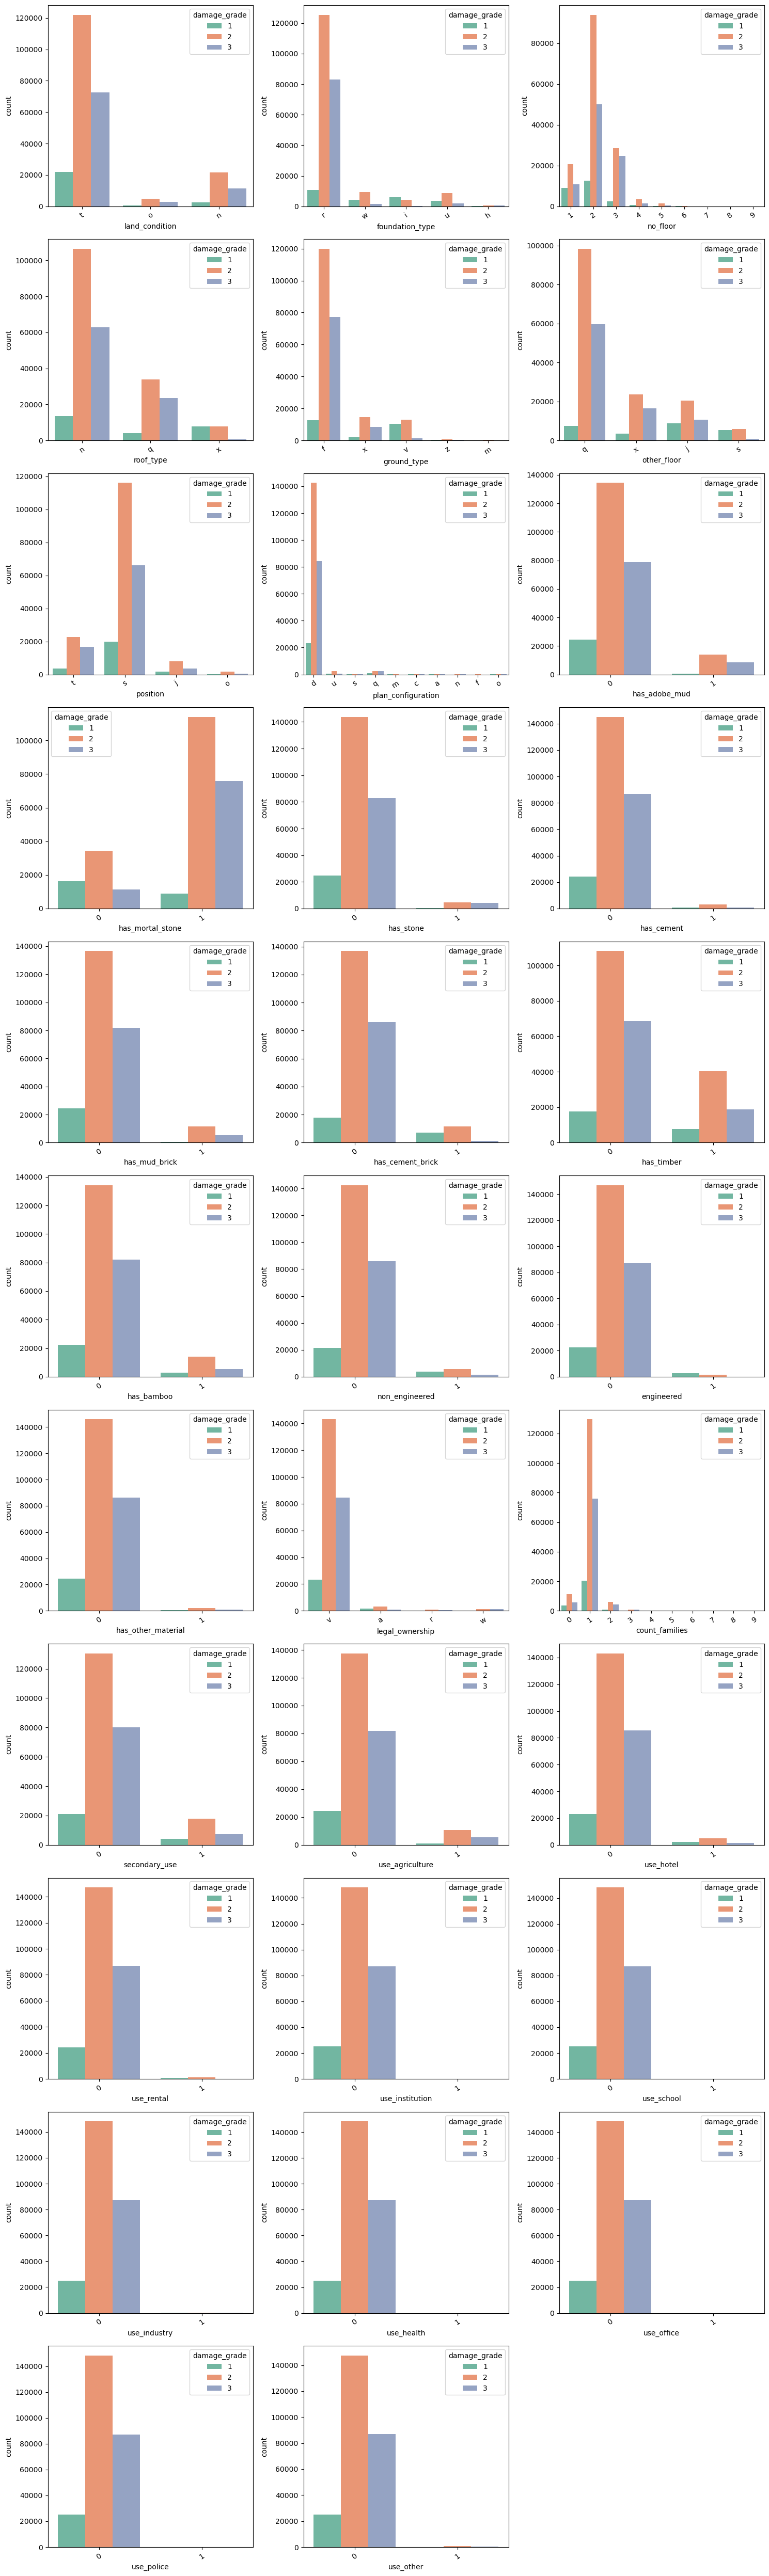

In [22]:
plt.figure(figsize=(15,50))
plotnumber=1
for i in df_cat:
    plt.subplot(11,3,plotnumber)
    sns.countplot(x=df_cat[i],hue=df3.damage_grade,palette='Set2')
    plt.xticks(rotation=35)
    plotnumber=plotnumber+1
    plt.tight_layout()
plt.show()    

### Insight's 
<br>


#### land_condition:   
The distribution of damage grades appears to vary across different land conditions. For example, land condition "t" seems to have a higher proportion of buildings with damage grade 1 compared to land condition "n.". The data suggests that land condition might be a significant factor influencing building damage. Buildings on certain land conditions (e.g., "n") may be more susceptible to damage.  

#### foundation_type:   
The distribution of damage grades also varies across different foundation types. Some foundation types (e.g., "h" or "w") may be associated with higher levels of damage.The data indicates that the choice of foundation type can affect building performance during an earthquake.  

#### no_floor:  
The distribution of damage grades appears to be influenced by the number of floors in a building. Buildings with more floors may be more likely to experience higher levels of damage. The data suggests that taller buildings may be more vulnerable to earthquake damage.  

#### roof_type:  
The distribution of damage grades appears to vary across different roof types. Some roof types (e.g., "m") may be associated with higher levels of damage.The data indicates that the choice of roof type can affect building performance during an earthquake.  

#### ground_type:  
The distribution of damage grades also varies across different ground types. Certain ground types (e.g., "r") may be more susceptible to damage. Ground Conditions: The data suggests that the underlying ground conditions can impact building vulnerability.  

#### other_floor:    
The distribution of damage grades appears to be influenced by the type of construction used in higher floors. Some construction types (e.g., "o") may be more vulnerable to damage. The data indicates that the choice of materials and techniques used in higher floors can affect building performance.

#### position: 
The distribution of damage grades appears to vary across different building positions. Some positions (e.g., "c") may be associated with higher levels of damage. The data suggests that the location of a building within a settlement can influence its vulnerability to earthquake damage.  

#### plan_configuration:
The distribution of damage grades also varies across different building plan configurations. Certain configurations (e.g., "r") may be more susceptible to damage. The data indicates that the layout and design of a building can affect its performance during an earthquake.  

#### has_adobe_mud:  
The distribution of damage grades appears to be influenced by the use of adobe mud in the superstructure. Buildings constructed with adobe mud may be more likely to experience damage. The data suggests that adobe mud may be a relatively vulnerable material in earthquake-prone regions.

#### has_mortal_stone:
 The distribution of damage grades appears to vary based on the presence of mortal stone in the superstructure. Buildings with mortal stone may be more likely to experience damage. The data suggests that mortal stone may be a relatively vulnerable material in earthquake-prone regions.  

#### has_stone:  
The distribution of damage grades also varies across buildings with and without stone in the superstructure. Buildings with stone may be more or less susceptible to damage depending on factors like the type of stone and its construction method. The data indicates that the use of stone can influence building performance during an earthquake.

#### has_cement:   
The distribution of damage grades appears to be influenced by the presence of cement in the superstructure. Buildings with cement may be more or less likely to experience damage depending on factors like the quality of the cement and its reinforcement. The data suggests that the use of cement can impact building vulnerability.  

#### has_mud_brick: 
The distribution of damage grades appears to vary based on the presence of mud brick in the superstructure. Buildings with mud brick may be more likely to experience damage. The data suggests that mud brick may be a relatively vulnerable material in earthquake-prone regions.  

#### has_cement_brick: 
The distribution of damage grades also varies across buildings with and without cement brick in the superstructure. Buildings with cement brick may be more or less susceptible to damage depending on factors like the quality of the cement and its reinforcement. The data indicates that the use of cement brick can influence building performance during an earthquake.  

#### has_timber: 
The distribution of damage grades appears to be influenced by the presence of timber in the superstructure. Buildings with timber may be more or less likely to experience damage depending on factors like the type of timber, its construction method, and the presence of any fireproofing measures. The data suggests that the use of timber can impact building vulnerability.

#### has_bamboo:  
The distribution of damage grades appears to vary based on the presence of bamboo in the superstructure. Buildings with bamboo may be more or less susceptible to damage depending on factors like the type of bamboo, its construction method, and the presence of any reinforcement. The data indicates that the use of bamboo can influence building performance during an earthquake.  

#### non_engineered: 
The distribution of damage grades also varies across buildings that are non-engineered reinforced concrete. These buildings may be more likely to experience damage compared to engineered reinforced concrete. The data suggests that the lack of engineering in the reinforced concrete can impact building vulnerability.  

#### engineered: 
The distribution of damage grades appears to be influenced by the presence of engineered reinforced concrete. Buildings with engineered reinforced concrete may be less likely to experience severe damage due to the improved structural design. The data indicates that engineered reinforced concrete can enhance building performance during an earthquake.  

#### has_other_material: 
The distribution of damage grades appears to vary based on the presence of other materials in the superstructure. Buildings with other materials may be more or less susceptible to damage depending on the specific material and its construction method. The data indicates that the use of other materials can influence building performance during an earthquake.  

#### legal_ownership:  
The distribution of damage grades also varies across buildings with different legal ownership statuses. Buildings with certain legal ownership statuses may be more or less likely to experience damage. The data suggests that property rights and ownership can influence building maintenance and repair efforts, potentially affecting vulnerability.   

#### count_families: 
The distribution of damage grades appears to be influenced by the number of families living in a building. Buildings with a higher number of families may be more likely to experience damage due to factors like increased occupancy and potential structural strain. The data indicates that the number of families living in a building can impact its vulnerability to earthquake damage.  

#### secondary_use: 
The distribution of damage grades appears to vary based on the presence of secondary use. Buildings with secondary uses may be more or less likely to experience damage depending on the specific use and its associated activities. The data indicates that the primary and secondary functions of a building can influence its vulnerability to earthquake damage.

#### use_agriculture: 
The distribution of damage grades also varies across buildings with and without agricultural use. Buildings used for agricultural purposes may be more or less susceptible to damage depending on factors like the type of agriculture, building construction, and location. The data suggests that the use of a building for agricultural purposes can impact its vulnerability to earthquake damage.  

#### use_hotel: 
The distribution of damage grades appears to be influenced by the use of a building as a hotel. Hotels may be more or less likely to experience damage depending on factors like their construction standards, location, and occupancy rates. The data indicates that the use of a building as a hotel can influence its vulnerability to earthquake damage.

#### use_rental: 
The distribution of damage grades appears to vary based on the use of a building for rental purposes. Buildings used for rental may be more or less likely to experience damage depending on factors like the type of rental property, maintenance practices, and occupancy rates. The data indicates that the use of a building for rental can influence its vulnerability to earthquake damage.  

#### use_institution: 
The distribution of damage grades also varies across buildings with and without institutional use. Buildings used for institutional purposes may be more or less susceptible to damage depending on factors like the type of institution, building construction, and location. The data suggests that the use of a building for institutional purposes can impact its vulnerability to earthquake damage.

#### use_school: 
The distribution of damage grades appears to be influenced by the use of a building as a school. Schools may be more or less likely to experience damage depending on factors like construction standards, location, and occupancy rates. The data indicates that the use of a building as a school can influence its vulnerability to earthquake damage.

#### use_industry: 
The distribution of damage grades appears to vary based on the use of a building for industrial purposes. Buildings used for industrial may be more or less likely to experience damage depending on factors like the type of industry, building construction, and location. The data indicates that the use of a building for industrial purposes can influence its vulnerability to earthquake damage. 

#### use_health: 
The distribution of damage grades also varies across buildings with and without health use. Buildings used for health purposes may be more or less susceptible to damage depending on factors like the type of health facility, building construction, and location. The data suggests that the use of a building for health purposes can impact its vulnerability to earthquake damage.

#### use_office:
The distribution of damage grades appears to be influenced by the use of a building as an office. Offices may be more or less likely to experience damage depending on factors like building construction, location, and occupancy rates. The data indicates that the use of a building as an office can influence its vulnerability to earthquake damage.

#### use_police: 
 The distribution of damage grades appears to vary based on the use of a building as a police station. Police stations may be more or less likely to experience damage depending on factors like building construction, location, and security measures. The data suggests that the use of a building as a police station can influence its vulnerability to earthquake damage.  

#### use_other: 
The distribution of damage grades also varies across buildings with and without other secondary uses. Buildings used for other purposes may be more or less susceptible to damage depending on the specific use and its associated activities. The data indicates that the use of a building for other purposes can impact its vulnerability to earthquake damage.






























# Data Preprocessing

### Checking for null values

In [ ]:
df3.isnull().sum()      # No null values

### Handling Outliers

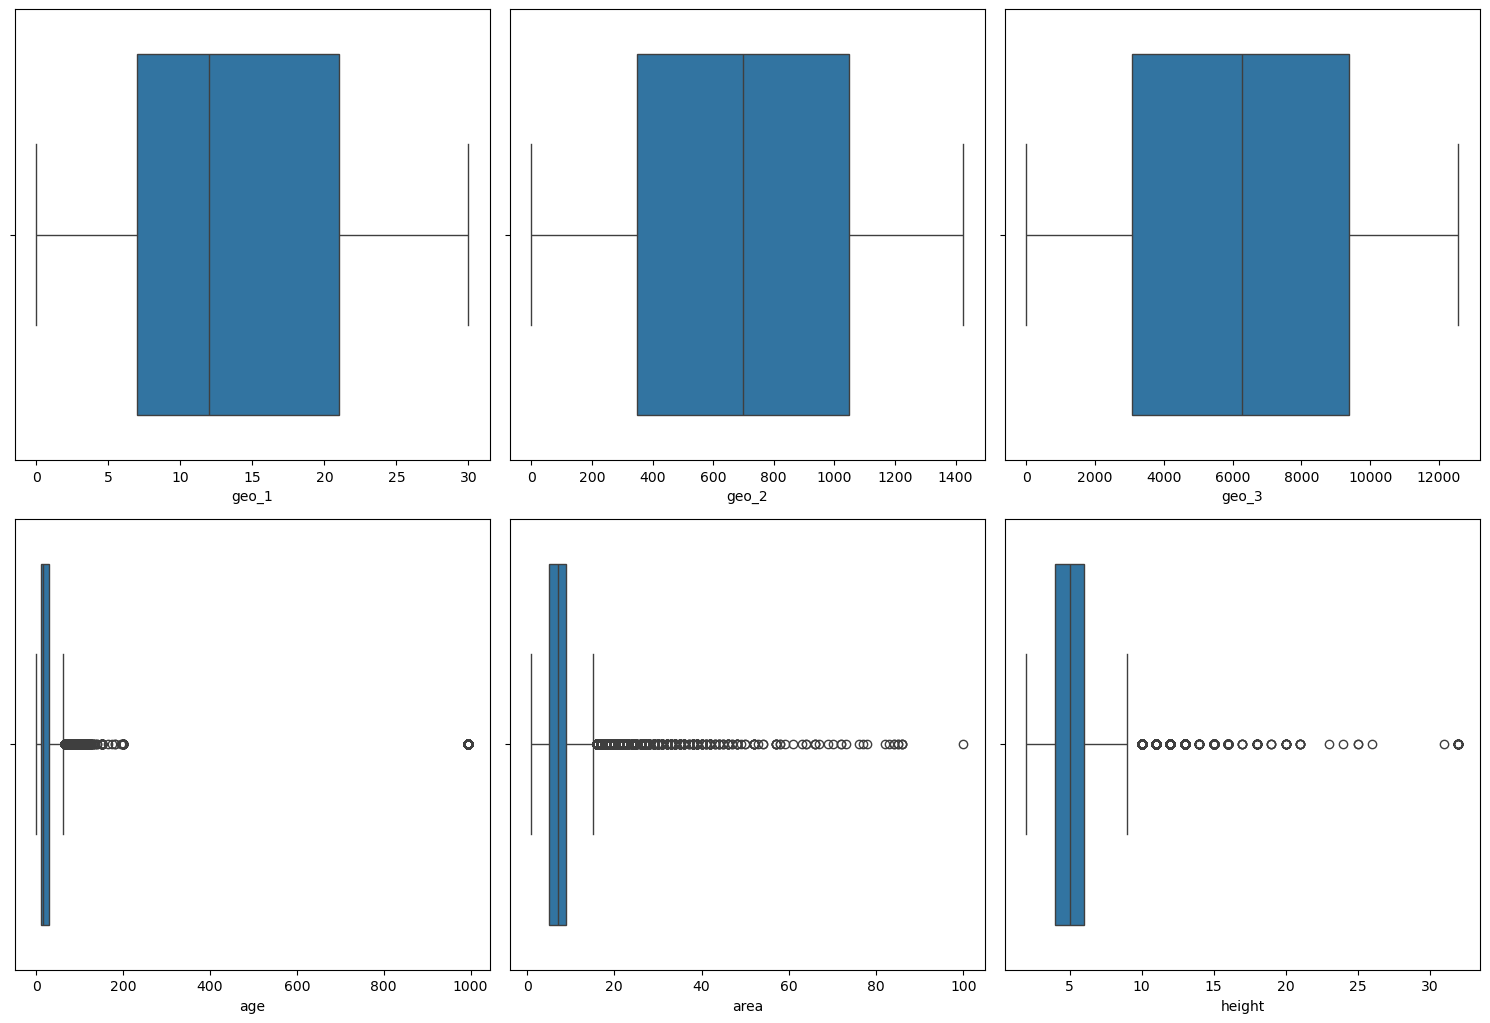

In [18]:
plt.figure(figsize=(15,15))
plotnumber=1
for i in df_num:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x=df_num[i])
    plotnumber=plotnumber+1
    plt.tight_layout()
plt.show()    

In [17]:
df3.loc[df3.age > 210 , 'age' ] = np.median(df3.age.dropna())

In [18]:
df3.loc[df3.area > 90 , 'area' ] = np.median(df3.area.dropna())

In [19]:
df3.loc[df3.height > 25 , 'height' ] = np.median(df3.height.dropna())

## Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [21]:
df3.head()

,building_id,geo_1,geo_2,geo_3,no_floor,age,area,height,land_condition,foundation_type,roof_type,ground_type,other_floor,position,plan_configuration,has_adobe_mud,has_mortal_stone,has_stone,has_cement,has_mud_brick,has_cement_brick,has_timber,has_bamboo,non_engineered,engineered,has_other_material,legal_ownership,count_families,secondary_use,use_agriculture,use_hotel,use_rental,use_institution,use_school,use_industry,use_health,use_office,use_police,use_other,damage_grade
111801,1023112,10,1224,11128,1,20,7,3,t,r,n,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
91817,64407,22,1101,12483,2,60,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
251661,967834,26,39,11440,2,50,6,5,t,r,n,v,q,s,d,0,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
205479,36669,8,1073,2743,3,50,7,6,o,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
22618,242842,6,706,7959,2,15,8,4,t,r,n,f,x,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [22]:
df3.geo_1=LE.fit_transform(df3.geo_1)
df3.geo_2=LE.fit_transform(df3.geo_2)
df3.geo_3=LE.fit_transform(df3.geo_3)
df3.no_floor=LE.fit_transform(df3.no_floor)
df3.age=LE.fit_transform(df3.age)
df3.area=LE.fit_transform(df3.area)
df3.height=LE.fit_transform(df3.height)
df3.land_condition=LE.fit_transform(df3.land_condition)
df3.foundation_type=LE.fit_transform(df3.foundation_type)
df3.roof_type=LE.fit_transform(df3.roof_type)
df3.ground_type=LE.fit_transform(df3.ground_type)
df3.other_floor=LE.fit_transform(df3.other_floor)
df3.position=LE.fit_transform(df3.position)
df3.plan_configuration=LE.fit_transform(df3.plan_configuration)
df3.has_adobe_mud=LE.fit_transform(df3.has_adobe_mud)
df3.has_mortal_stone=LE.fit_transform(df3.has_mortal_stone)
df3.has_stone=LE.fit_transform(df3.has_stone)
df3.has_cement=LE.fit_transform(df3.has_cement)
df3.has_mud_brick=LE.fit_transform(df3.has_mud_brick)
df3.has_cement_brick=LE.fit_transform(df3.has_cement_brick)
df3.has_timber=LE.fit_transform(df3.has_timber)
df3.has_bamboo=LE.fit_transform(df3.has_bamboo)
df3.non_engineered=LE.fit_transform(df3.non_engineered)
df3.engineered=LE.fit_transform(df3.engineered)
df3.has_other_material=LE.fit_transform(df3.has_other_material)
df3.legal_ownership=LE.fit_transform(df3.legal_ownership)
df3.count_families=LE.fit_transform(df3.count_families)
df3.secondary_use=LE.fit_transform(df3.secondary_use)
df3.use_agriculture=LE.fit_transform(df3.use_agriculture)
df3.use_hotel=LE.fit_transform(df3.use_hotel)
df3.use_rental=LE.fit_transform(df3.use_rental)
df3.use_institution=LE.fit_transform(df3.use_institution)
df3.use_school=LE.fit_transform(df3.use_school)
df3.use_industry=LE.fit_transform(df3.use_industry)
df3.use_health=LE.fit_transform(df3.use_health)
df3.use_office=LE.fit_transform(df3.use_office)
df3.use_police=LE.fit_transform(df3.use_police)
df3.use_other=LE.fit_transform(df3.use_other)
df3.damage_grade=LE.fit_transform(df3.damage_grade)





In [23]:
df3.head()

,building_id,geo_1,geo_2,geo_3,no_floor,age,area,height,land_condition,foundation_type,roof_type,ground_type,other_floor,position,plan_configuration,has_adobe_mud,has_mortal_stone,has_stone,has_cement,has_mud_brick,has_cement_brick,has_timber,has_bamboo,non_engineered,engineered,has_other_material,legal_ownership,count_families,secondary_use,use_agriculture,use_hotel,use_rental,use_institution,use_school,use_industry,use_health,use_office,use_police,use_other,damage_grade
111801,1023112,10,1168,8861,0,4,6,1,2,2,0,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
91817,64407,22,1050,9951,1,12,6,4,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
251661,967834,26,36,9112,1,10,5,3,2,2,0,2,1,2,2,0,0,0,0,1,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
205479,36669,8,1022,2205,2,10,6,4,1,2,1,0,1,2,2,0,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
22618,242842,6,670,6342,1,3,7,2,2,2,0,0,3,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1


### Scaling 

In [24]:
from sklearn.preprocessing import MinMaxScaler
Min=MinMaxScaler()

In [25]:
df3.head()

,building_id,geo_1,geo_2,geo_3,no_floor,age,area,height,land_condition,foundation_type,roof_type,ground_type,other_floor,position,plan_configuration,has_adobe_mud,has_mortal_stone,has_stone,has_cement,has_mud_brick,has_cement_brick,has_timber,has_bamboo,non_engineered,engineered,has_other_material,legal_ownership,count_families,secondary_use,use_agriculture,use_hotel,use_rental,use_institution,use_school,use_industry,use_health,use_office,use_police,use_other,damage_grade
111801,1023112,10,1168,8861,0,4,6,1,2,2,0,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
91817,64407,22,1050,9951,1,12,6,4,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
251661,967834,26,36,9112,1,10,5,3,2,2,0,2,1,2,2,0,0,0,0,1,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
205479,36669,8,1022,2205,2,10,6,4,1,2,1,0,1,2,2,0,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
22618,242842,6,670,6342,1,3,7,2,2,2,0,0,3,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1


In [26]:
df3.secondary_use.unique()

array([0, 1], dtype=int64)

In [27]:
df3.geo_1=Min.fit_transform(df3[['geo_1']])
df3.geo_2=Min.fit_transform(df3[['geo_2']])
df3.geo_3=Min.fit_transform(df3[['geo_3']])
df3.no_floor=Min.fit_transform(df3[['no_floor']])
df3.age=Min.fit_transform(df3[['age']])
df3.area=Min.fit_transform(df3[['area']])
df3.height=Min.fit_transform(df3[['height']])




In [29]:
df3.head()

,building_id,geo_1,geo_2,geo_3,no_floor,age,area,height,land_condition,foundation_type,roof_type,ground_type,other_floor,position,plan_configuration,has_adobe_mud,has_mortal_stone,has_stone,has_cement,has_mud_brick,has_cement_brick,has_timber,has_bamboo,non_engineered,engineered,has_other_material,legal_ownership,count_families,secondary_use,use_agriculture,use_hotel,use_rental,use_institution,use_school,use_industry,use_health,use_office,use_police,use_other,damage_grade
111801,1023112,0.333333,0.858193,0.885126,0.000,0.117647,0.083333,0.045455,2,2,0,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
91817,64407,0.733333,0.771492,0.994007,0.125,0.352941,0.083333,0.181818,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
251661,967834,0.866667,0.026451,0.910199,0.125,0.294118,0.069444,0.136364,2,2,0,2,1,2,2,0,0,0,0,1,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
205479,36669,0.266667,0.750918,0.220258,0.250,0.294118,0.083333,0.181818,1,2,1,0,1,2,2,0,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
22618,242842,0.200000,0.492285,0.633503,0.125,0.088235,0.097222,0.090909,2,2,0,0,3,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1


# Feature Selection

In [30]:
df3.drop('building_id',axis=1).corr()

,geo_1,geo_2,geo_3,no_floor,age,area,height,land_condition,foundation_type,roof_type,ground_type,other_floor,position,plan_configuration,has_adobe_mud,has_mortal_stone,has_stone,has_cement,has_mud_brick,has_cement_brick,has_timber,has_bamboo,non_engineered,engineered,has_other_material,legal_ownership,count_families,secondary_use,use_agriculture,use_hotel,use_rental,use_institution,use_school,use_industry,use_health,use_office,use_police,use_other,damage_grade
geo_1,1.000000,-0.060149,0.004972,-0.083386,-0.043304,0.070269,-0.059892,0.028884,0.195737,0.038386,0.052688,0.003562,-0.012253,0.032466,-0.015075,-0.151425,0.008123,0.028504,-0.025358,0.130722,0.144139,0.075360,0.020057,0.015690,0.020812,-0.088320,0.037806,-0.013747,-0.021216,-0.000798,0.018784,0.005050,0.002931,0.001865,0.003811,0.007160,0.001522,-0.014571,-0.073790
geo_2,-0.060149,1.000000,-0.001481,0.050777,0.028293,-0.047772,0.039186,-0.033009,-0.033855,-0.093386,-0.095709,-0.013464,0.011623,-0.019446,0.014943,0.077897,-0.008047,-0.007869,0.013538,-0.083312,-0.026312,-0.033920,-0.038076,-0.040438,-0.019516,0.032567,-0.011342,-0.001306,0.017829,-0.008781,-0.031825,-0.003992,0.000250,0.004818,-0.000939,-0.004192,-0.002279,-0.011194,0.042560
geo_3,0.004972,-0.001481,1.000000,-0.021510,-0.009301,-0.003246,-0.023047,-0.018133,0.011227,-0.007175,-0.008739,-0.005981,0.013581,0.001181,-0.020937,0.028624,0.024693,0.005631,-0.024127,-0.004497,0.000102,0.009829,0.001375,-0.013867,-0.007863,-0.037120,-0.001011,0.010578,0.016581,0.000231,-0.005314,-0.003438,-0.000463,-0.000955,-0.003624,0.004122,-0.000340,-0.002410,0.005045
no_floor,-0.083386,0.050777,-0.021510,1.000000,0.294628,0.100345,0.789582,0.043244,-0.150473,0.091748,-0.046692,0.366140,-0.175371,-0.023074,0.169992,-0.025965,-0.036327,-0.007273,0.253084,-0.083956,-0.059123,-0.072250,0.000125,0.051643,-0.027867,0.092672,0.087999,0.056349,-0.003287,0.080224,0.037289,0.011837,0.001324,-0.000663,0.001783,0.003463,0.004885,-0.000268,0.120372
age,-0.043304,0.028293,-0.009301,0.294628,1.000000,-0.030780,0.205487,0.027856,-0.093017,-0.086180,-0.091534,0.038526,-0.154758,-0.017354,0.202236,0.015963,0.015705,-0.039759,0.276127,-0.122897,-0.036467,-0.048388,-0.081568,-0.095157,-0.003833,0.080786,0.045559,-0.035674,0.002574,-0.048340,-0.023787,-0.012225,-0.004967,-0.002126,-0.006706,-0.002919,0.000543,-0.004754,0.150979
area,0.070269,-0.047772,-0.003246,0.100345,-0.030780,1.000000,0.207296,0.029298,-0.103525,0.263441,0.213192,0.111199,-0.045357,0.090717,0.022794,-0.228643,-0.000741,0.071391,0.052096,0.215675,-0.054564,-0.033504,0.189670,0.226435,0.006855,0.029845,0.086499,0.126097,-0.019852,0.164486,0.115919,0.043824,0.048972,0.021275,0.022336,0.021827,0.006095,0.009219,-0.131741
height,-0.059892,0.039186,-0.023047,0.789582,0.205487,0.207296,1.000000,0.021194,-0.154458,0.169936,0.048251,0.354933,-0.154086,-0.001088,0.152191,-0.110770,-0.015412,0.018365,0.212002,0.004766,-0.054340,-0.066213,0.082752,0.139049,-0.016832,0.076379,0.066596,0.092044,-0.011615,0.130523,0.071334,0.027820,0.011946,0.002939,0.008183,0.005990,0.003777,0.007104,0.040709
land_condition,0.028884,-0.033009,-0.018133,0.043244,0.027856,0.029298,0.021194,1.000000,-0.008120,0.052957,0.021956,-0.038152,-0.029659,0.004215,0.008516,-0.074908,-0.048807,-0.009825,0.058698,0.056829,-0.035452,-0.027690,0.010633,0.023779,-0.034134,0.013766,0.007214,0.004203,-0.002909,0.007981,0.006129,-0.001436,0.005574,0.001989,0.004202,-0.000536,0.002437,-0.010938,-0.011063
foundation_type,0.195737,-0.033855,0.011227,-0.150473,-0.093017,-0.103525,-0.154458,-0.008120,1.000000,-0.080636,-0.043073,-0.021005,0.009567,0.022908,-0.049967,-0.152548,-0.045687,0.037642,-0.032934,0.086810,0.261229,0.238516,-0.167752,-0.200949,0.008437,-0.196347,-0.005908,-0.054997,0.006013,-0.070480,-0.053026,-0.019850,-0.005300,0.000561,-0.004335,-0.009650,0.001047,-0.010175,-0.099391
roof_type,0.038386,-0.093386,-0.007175,0.091748,-0.086180,0.263441,0.169936,0.052957,-0.080636,1.000000,0.260763,0.048582,-0.044563,0.0

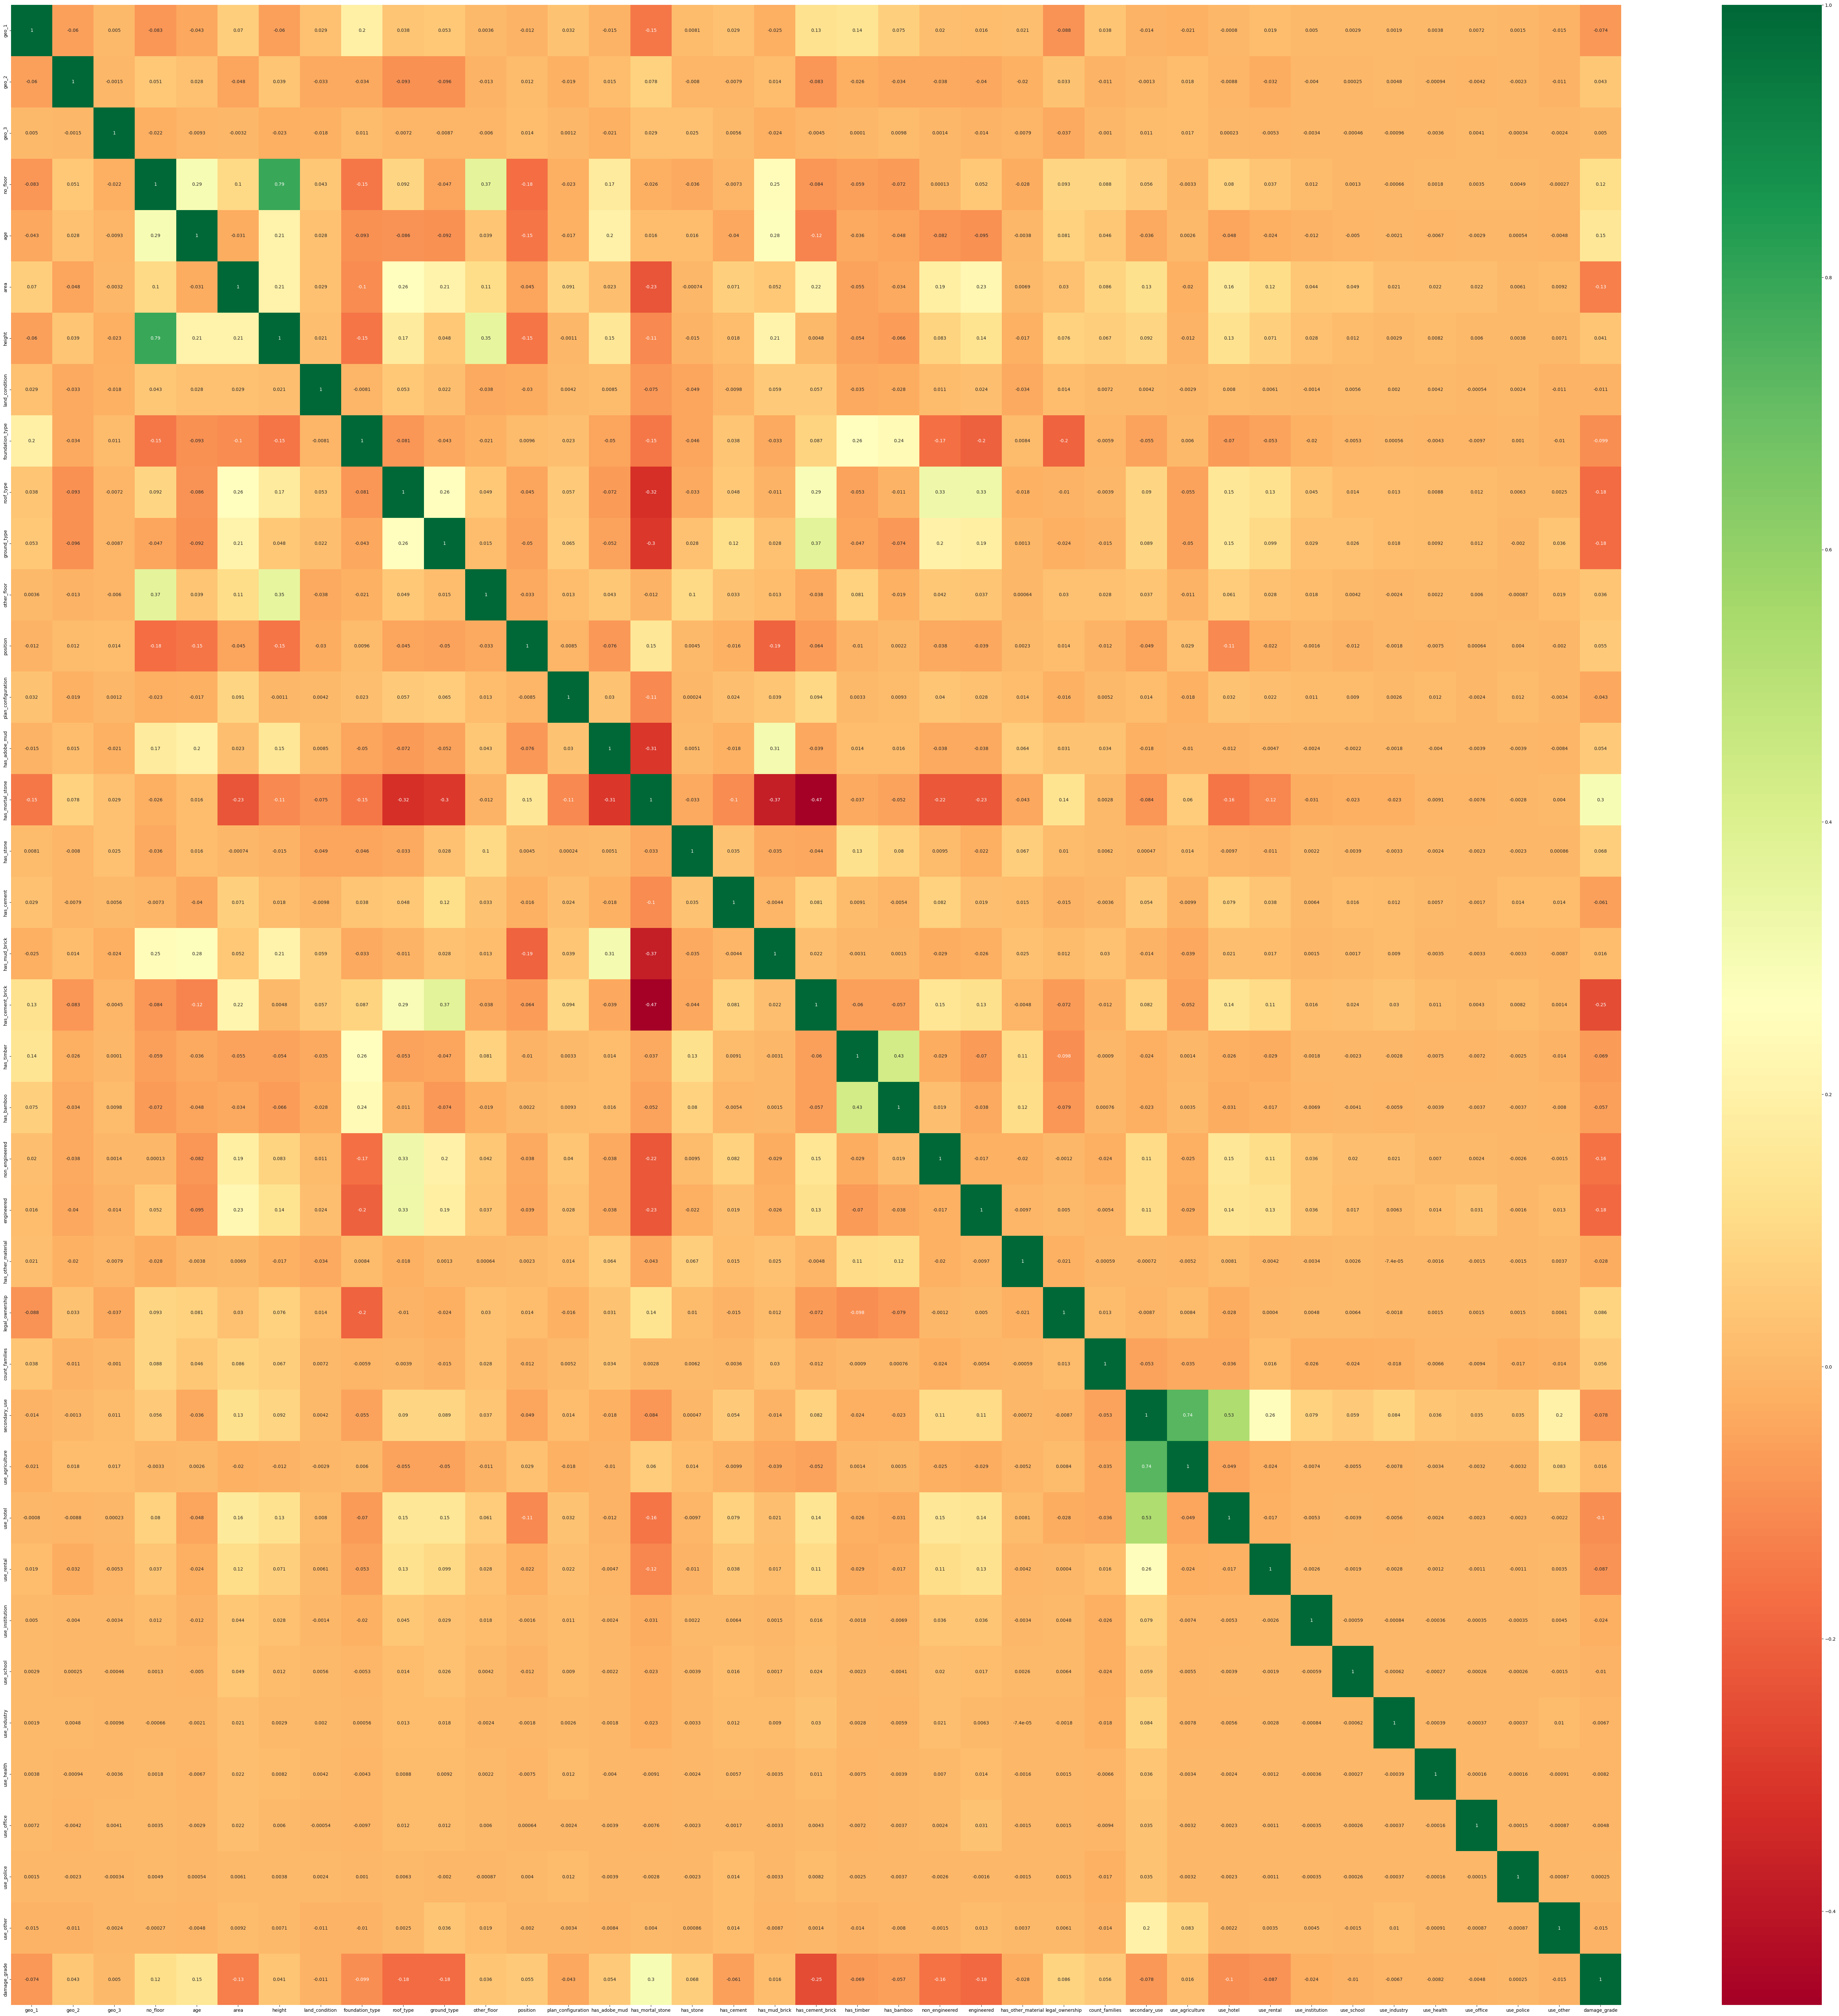

In [68]:
plt.figure(figsize=(80,80))
sns.heatmap(df3.drop('building_id',axis=1).corr(),annot=True, cmap='RdYlGn' )
plt.show()

### Split the data into train, test

In [33]:
x=df3.drop(['damage_grade','building_id'],axis=1)
x

,geo_1,geo_2,geo_3,no_floor,age,area,height,land_condition,foundation_type,roof_type,ground_type,other_floor,position,plan_configuration,has_adobe_mud,has_mortal_stone,has_stone,has_cement,has_mud_brick,has_cement_brick,has_timber,has_bamboo,non_engineered,engineered,has_other_material,legal_ownership,count_families,secondary_use,use_agriculture,use_hotel,use_rental,use_institution,use_school,use_industry,use_health,use_office,use_police,use_other
111801,0.333333,0.858193,0.885126,0.000,0.117647,0.083333,0.045455,2,2,0,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
91817,0.733333,0.771492,0.994007,0.125,0.352941,0.083333,0.181818,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
251661,0.866667,0.026451,0.910199,0.125,0.294118,0.069444,0.136364,2,2,0,2,1,2,2,0,0,0,0,1,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
205479,0.266667,0.750918,0.220258,0.250,0.294118,0.083333,0.181818,1,2,1,0,1,2,2,0,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
22618,0.200000,0.492285,0.633503,0.125,0.088235,0.097222,0.090909,2,2,0,0,3,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,0.133333,0.941220,0.464589,0.125,0.058824,0.069444,0.136364,2,2,1,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
17267,0.233333,0.221896,0.228349,0.125,0.058824,0.069444,0.181818,2,2,0,0,1,2,2,1,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
66715,0.000000,0.372520,0.190490,0.125,0.117647,0.083333,0.136364,2,2,0,0,1,2,2,0,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
243127,0.366667,0.107274,0.989611,0.125,0.264706,0.097222,0.272727,2,2,0,0,3,2,2,0,1,1,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0


In [34]:
y=df3.damage_grade
y

111801    1
91817     1
251661    1
205479    1
22618     1
         ..
2783      1
17267     2
66715     1
243127    2
2108      2
Name: damage_grade, Length: 78180, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [37]:
x_train

,geo_1,geo_2,geo_3,no_floor,age,area,height,land_condition,foundation_type,roof_type,ground_type,other_floor,position,plan_configuration,has_adobe_mud,has_mortal_stone,has_stone,has_cement,has_mud_brick,has_cement_brick,has_timber,has_bamboo,non_engineered,engineered,has_other_material,legal_ownership,count_families,secondary_use,use_agriculture,use_hotel,use_rental,use_institution,use_school,use_industry,use_health,use_office,use_police,use_other
59779,0.400000,0.396032,0.901209,0.125,0.058824,0.083333,0.136364,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
82732,0.866667,0.700220,0.507642,0.125,0.000000,0.069444,0.090909,2,4,1,2,3,2,2,0,0,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
146872,0.866667,0.716385,0.812706,0.000,0.000000,0.041667,0.045455,2,4,0,0,0,2,2,0,0,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
171727,0.333333,0.875092,0.235541,0.125,0.147059,0.069444,0.090909,2,2,0,0,1,2,2,0,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
177592,0.200000,0.928729,0.236939,0.125,0.088235,0.083333,0.227273,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95655,0.233333,0.290963,0.398462,0.125,0.029412,0.069444,0.181818,2,2,0,0,1,2,2,0,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
137131,0.200000,0.878766,0.246129,0.500,0.117647,0.208333,0.590909,2,1,2,2,2,0,2,0,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0
30785,0.200000,0.390154,0.095295,0.125,0.117647,0.055556,0.136364,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0
224295,0.366667,0.089640,0.626411,0.125,0.088235,0.069444,0.136364,0,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0


In [38]:
y_train

59779     1
82732     1
146872    0
171727    1
177592    2
         ..
95655     2
137131    0
30785     1
224295    1
183710    2
Name: damage_grade, Length: 58635, dtype: int64

# Balancing 

In [39]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()                                # Import the library for balancing the data

In [40]:
x_sm,y_sm=SM.fit_resample(x_train, y_train)    

In [41]:
from collections import Counter

In [42]:
print('y',Counter(y))
print('y_sm',Counter(y_sm))  # Data Has Balanced Now

y Counter({1: 44413, 2: 26166, 0: 7601})
y_sm Counter({1: 33210, 0: 33210, 2: 33210})


# Model Training 

# Applying For Logistic Regressionm

In [43]:
from sklearn.linear_model import LogisticRegression
Log=LogisticRegression(multi_class='ovr',random_state=42)

In [44]:
Log.fit(x_sm,y_sm)

LogisticRegression(multi_class='ovr', random_state=42)

In [45]:
yp_Log=Log.predict(x_test)
yp_Log


array([2, 1, 0, ..., 2, 1, 2], dtype=int64)

In [46]:
y_test.values

array([1, 1, 1, ..., 2, 1, 1], dtype=int64)

# Evaluation For Logistic Regression

In [47]:
from sklearn.metrics import accuracy_score ,recall_score , f1_score

In [48]:
accuracy_score(y_test,yp_Log)

0.4843694039396265

In [49]:
recall_score(y_test,yp_Log,average='weighted')

0.4843694039396265

In [50]:
f1_score(y_test,yp_Log,average='weighted')

0.470803402438287

In [55]:
from sklearn.model_selection import GridSearchCV

# Imports the GridSearchCV class, which performs an exhaustive search over a specified parameter grid to find the optimal hyperparameters 

In [56]:
param_gride = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

##### The param_grid defines a grid of hyperparameters for GridSearchCV to explore for tuning a logistic regression model, including different penalties (l1, l2, etc.), regularization strengths (C values on a log scale), solvers, and iteration limits. This setup helps find the optimal combination of these parameters.

In [58]:
grid=GridSearchCV(LogisticRegression(multi_class='ovr',random_state=42), param_gride ,scoring='f1', verbose=3, cv=2 )
grid
# Initializes a grid search to find the best hyperparameters for a logistic regression model 

GridSearchCV(cv=2,
             estimator=LogisticRegression(multi_class='ovr', random_state=42),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             scoring='f1', verbose=3)

In [64]:
 grid.fit(x_sm,y_sm)

NameError: name 'grid' is not defined

In [ ]:
grid.best_params_
#  retrieves the best hyperparameters found by the grid search for the logistic regression model.

In [ ]:
grid.best_estimator_
# returns the logistic regression model with the best hyperparameters found by the grid search

In [ ]:
clf_Log=LogisticRegression(C=1.623776739188721, max_iter=5000, random_state=42,
                   solver='sag')
# initializes a logistic regression model with a specific regularization strength, maximum iterations, random state for 
# reproducibility, and the 'sag' solveruyh


In [ ]:
clf_Log.fit(x_sm,y_sm)   # fitting the model

# Applying for KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
# initializes a k-nearest neighbors classifier with default parameters.

In [89]:
Error=[]
for i in range (1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_sm,y_sm)
    y_predict1=knn.predict(x_test)
    error=(y_test != y_predict1).sum()/len(y_test)*100
    Error.append(error)

# The code snippet calculates and appends the classification error percentage for a k-nearest neighbors model
# with varying n_neighbors values from 1 to 9, storing the results in the Error list.

In [62]:
Error

[40.31312356101305,
 40.9270913277053,
 41.96162701458174,
 41.38756715272448,
 42.597083653108214,
 42.34228702993093,
 43.238679969301614,
 43.02072141212586,
 44.23944742900998,
 43.57329240214889]

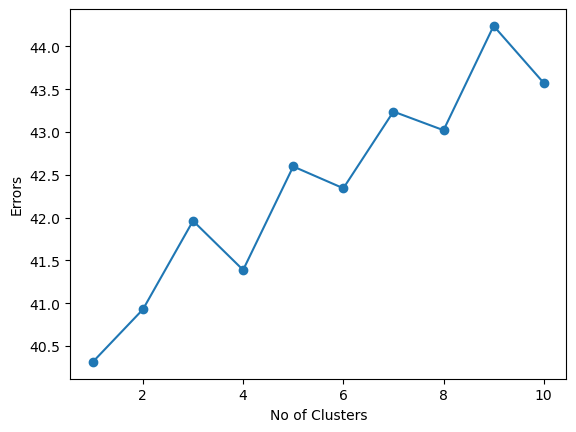

In [63]:
plt.plot(range(1,11),Error, marker='o')
plt.xlabel('No of Clusters')
plt.ylabel('Errors')
plt.show()

#  plots the classification errors against the number of neighbors, with markers at each data point, and 
# labels the x-axis as 'No of Clusters' and the y-axis as 'Errors' before displaying the plot.

In [67]:
KNN=KNeighborsClassifier(n_neighbors=6)
#  initializes a k-nearest neighbors classifier with 7 neighbors.

In [68]:
KNN.fit(x_sm,y_sm)  # fitting the data

KNeighborsClassifier(n_neighbors=6)

In [69]:
y_predict_KNN=KNN.predict(x_test)
y_predict_KNN

array([0, 1, 1, ..., 1, 2, 1], dtype=int64)

# Model Evaluation for KNN

In [70]:
from sklearn.metrics import accuracy_score , f1_score , recall_score

In [71]:
accuracy_score(y_test,y_predict_KNN)

0.5765771297006907

In [72]:
f1_score(y_test,y_predict_KNN,average ='weighted')

0.5857553803433617

In [73]:
recall_score(y_test,y_predict_KNN,average ='weighted')

0.5765771297006907

# Hyperparameter Tuning for KNN

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
grid_params = { 'n_neighbors' : [6],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

#grid_params dictionary specifies a grid of hyperparameters for tuning a k-nearest neighbors classifier, 
#including n_neighbors, weights, and metric options

We will use three hyperparamters- n-neighbors, weights and metric.

n_neighbors: Decide the best k based on the values we have computed earlier. weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points. metric: The distance metric to be used will calculating the similarity



In [78]:
grid_knn=GridSearchCV(KNeighborsClassifier(), grid_params ,scoring='f1', verbose=3, cv=4 )
grid_knn

# initializes a grid search to optimize k-nearest neighbors hyperparameters using the specified parameter grid,
# aiming to maximize the F1 score with 4-fold cross-validation and detailed logging

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [6],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)

In [79]:
 grid_knn.fit(x_sm,y_sm)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4] END metric=minkowski, n_neighbors=6, weights=uniform;, score=nan total time=  30.6s
[CV 2/4] END metric=minkowski, n_neighbors=6, weights=uniform;, score=nan total time=  30.2s
[CV 3/4] END metric=minkowski, n_neighbors=6, weights=uniform;, score=nan total time=  30.6s
[CV 4/4] END metric=minkowski, n_neighbors=6, weights=uniform;, score=nan total time=  30.6s
[CV 1/4] END metric=minkowski, n_neighbors=6, weights=distance;, score=nan total time=  26.2s
[CV 2/4] END metric=minkowski, n_neighbors=6, weights=distance;, score=nan total time=  26.3s
[CV 3/4] END metric=minkowski, n_neighbors=6, weights=distance;, score=nan total time=  26.3s
[CV 4/4] END metric=minkowski, n_neighbors=6, weights=distance;, score=nan total time=  26.3s
[CV 1/4] END metric=euclidean, n_neighbors=6, weights=uniform;, score=nan total time=  29.8s
[CV 2/4] END metric=euclidean, n_neighbors=6, weights=uniform;, score=nan total time=  30.2s
[CV 3/

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [6],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)

In [80]:
grid_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'uniform'}

In [81]:
grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=6)

In [82]:
# change the parameters as best estimator
hyp=KNeighborsClassifier(metric='minkowski', n_neighbors=6, weights='uniform')


In [83]:
hyp.fit(x_sm,y_sm)

KNeighborsClassifier(n_neighbors=6)

In [84]:
y_hyp_predict=hyp.predict(x_test)
y_hyp_predict

array([0, 1, 1, ..., 1, 2, 1], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score,  recall_score, f1_score, classification_report

In [86]:
accuracy_score(y_test,y_hyp_predict)

0.5765771297006907

In [91]:
recall_score(y_test,y_hyp_predict,average='weighted')

0.5765771297006907

In [92]:
f1_score(y_test,y_hyp_predict,average='weighted')

0.5857553803433617

In [93]:
print(classification_report(y_test,y_hyp_predict))

              precision    recall  f1-score   support

           0       0.34      0.74      0.46      3205
           1       0.70      0.55      0.61     18533
           2       0.57      0.58      0.57     10837

    accuracy                           0.58     32575
   macro avg       0.54      0.62      0.55     32575
weighted avg       0.62      0.58      0.59     32575



In [ ]:
f1_score=0.58   

In [ ]:
recall_score=0.57

# Applying for Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier         #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier(random_state=42)              #object creation for decision tree  


In [45]:
dt.fit(x_sm,y_sm) #training the model


DecisionTreeClassifier(random_state=42)

In [46]:
y_hat=dt.predict(x_test)#prediction
y_hat

array([1, 1, 1, ..., 1, 2, 1], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [48]:
accuracy_score(y_test,y_hat)

0.6261550268610898

In [50]:
f1_score(y_test,y_hat,average='weighted')

0.6275265294308904

In [51]:
recall_score(y_test,y_hat,average='weighted')

0.6261550268610898

In [52]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.43      0.47      0.45      3205
           1       0.69      0.67      0.68     18533
           2       0.59      0.60      0.59     10837

    accuracy                           0.63     32575
   macro avg       0.57      0.58      0.57     32575
weighted avg       0.63      0.63      0.63     32575



# Hyperparameter Tuning For Decision Tree

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
list(range(1, 20))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [55]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20))
}

#  parameter grid for tuning a decision tree classifier with various options for criteria, split methods, maximum depth, 
# and minimum samples for splitting and leaf nodes.

In [56]:
dt1 = DecisionTreeClassifier(random_state=42)

In [57]:
grid = GridSearchCV(dt1, params, scoring='f1', cv = 3, verbose = 3, n_jobs=-1)

# initializes a grid search to optimize the decision tree classifier dt1 using the specified parameter grid,
# optimizing for the F1 score with 5-fold cross-validation, detailed logging, and parallel processing.

In [ ]:
grid.fit(x_sm,y_sm)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
dt2 = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 1,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'best', random_state=42)

# initializes a decision tree classifier with specific hyperparameters for criterion, maximum depth, minimum samples per 
# leaf and split, and splitter method.


In [ ]:
dt2.fit(x_sm,y_sm)

In [ ]:
y_pred1 = dt2.predict(x_test)
y_pred1

In [ ]:
y_train_pred1 = dt2.predict(x_train)
y_train_pred1

In [ ]:
accuracy_score(y_train, y_train_pred1)

In [ ]:
accuracy_score(y_test, y_pred1)

In [ ]:
f1_score(y_test, y_pred1,average='weighted')

In [ ]:
recall_score(y_test, y_pred1,average='weighted')

In [ ]:
print(classification_report(y_train, y_train_pred1))

In [ ]:
f1_score=0.21  

In [ ]:
recall_score=0.35

# Applying for Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)

In [92]:
RF.fit(x_sm,y_sm)

RandomForestClassifier()

In [93]:
yp_test=RF.predict(x_test)
yp_test

array([1, 1, 1, ..., 2, 0, 1], dtype=int64)

In [94]:
yp_train=RF.predict(x_train)
yp_train 

array([1, 1, 0, ..., 1, 1, 2], dtype=int64)

# Model Evaluation

In [95]:
from sklearn.metrics import accuracy_score , precision_score ,f1_score , recall_score, classification_report

In [96]:
accuracy_score(y_test,yp_test)

0.6856996674341264

In [98]:
precision_score(y_test,yp_test,average='weighted')

0.6835426149689358

In [99]:
recall_score(y_test,yp_test,average='weighted')

0.6856996674341264

In [100]:
f1_score(y_test,yp_test,average='weighted')

0.6834237666285424

In [101]:
print(classification_report(y_test,yp_test))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1902
           1       0.72      0.76      0.74     11203
           2       0.66      0.59      0.62      6440

    accuracy                           0.69     19545
   macro avg       0.65      0.64      0.64     19545
weighted avg       0.68      0.69      0.68     19545



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
n_estimators

In [ ]:
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 

In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rscv = RandomizedSearchCV(estimator=rfc, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [ ]:
rscv.fit(x_sm,y_sm)

In [ ]:
rscv.best_params_

In [ ]:
rf2 = RandomForestClassifier(n_estimators = 200,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 110,
 bootstrap = False)

In [ ]:
rf2.fit(x_train, y_train)

In [ ]:
y_pred3 = rf2.predict(x_test)
y_pred3_train = rf2.predict(x_train)

In [ ]:
f1_score(y_test,y_pred3)

In [ ]:
recall_score(y_test,y_pred3)

# Applying for Navie Bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()

In [52]:
NB.fit(x_sm,y_sm)

MultinomialNB()

In [53]:
y_predict_NB=NB.predict(x_test)
y_predict_NB

array([2, 1, 1, ..., 2, 1, 2], dtype=int64)

# Model Evaluation for Navie Bayes 

In [54]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , classification_report

In [55]:
accuracy_score(y_test,y_predict_NB)

0.42128421591199794

In [56]:
precision_score(y_test,y_predict_NB,average='weighted')

0.5274879239233093

In [57]:
recall_score(y_test,y_predict_NB,average='weighted')

0.42128421591199794

In [58]:
f1_score(y_test,y_predict_NB,average='weighted')

0.38884108842586407

In [59]:
print(classification_report(y_test,y_predict_NB))

              precision    recall  f1-score   support

           0       0.29      0.56      0.38      1902
           1       0.64      0.21      0.32     11203
           2       0.40      0.75      0.52      6440

    accuracy                           0.42     19545
   macro avg       0.44      0.51      0.40     19545
weighted avg       0.53      0.42      0.39     19545



# Applying for XGBoost

In [60]:
## model creation
from xgboost import XGBClassifier
xgb_r=XGBClassifier() 
xgb_r.fit(x_sm,y_sm)              ## fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [61]:
y_hat = xgb_r.predict(x_test)
y_hat

array([1, 1, 1, ..., 2, 1, 1], dtype=int64)

In [62]:
from sklearn.metrics import f1_score , recall_score , classification_report

In [64]:
f1_score(y_test,y_hat,average='weighted')

0.6998275081880673

In [65]:
recall_score(y_test,y_hat,average='weighted')

0.7058582757738552

In [ ]:
print(classification_report(y_test,y_hat))

# Hyperparameter tuning for XGbost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [ ]:
XGB = XGBClassifier(random_state=42, verbosity=0, silent=0)

In [ ]:
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [ ]:
rcv.fit(x_sm,y_sm)

In [ ]:
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

In [ ]:
XGB2 = XGBClassifier(reg_lambda= 1.6, reg_alpha= 12.8, n_estimators=50, max_depth= 8, learning_rate=0.6, gamma=0)

In [ ]:
XGB2.fit(x_sm,y_sm)

In [ ]:
y_predict=XGB2.predict(x_test)

In [ ]:
y_predict_train = XGB2.predict(x_train)

In [ ]:
f1_score(y_test,y_predict,average='weighted')

In [ ]:
f1=0.7082784264660861


In [ ]:
recall_score(y_test,y_predict,average='weighted')

In [ ]:
recall= 0.7134817088769506


# Applying For ANN

In [110]:
## Scaling the data as the magnitude of variables are varying lot
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
scaled_x=sc.fit_transform(x) ## transforming the data

In [111]:
x = pd.DataFrame(scaled_x, columns=x.columns) ##converting the arrays
## to dataframe

In [112]:
x

,geo_1,geo_2,geo_3,no_floor,age,area,height,land_condition,foundation_type,roof_type,ground_type,other_floor,position,plan_configuration,has_adobe_mud,has_mortal_stone,has_stone,has_cement,has_mud_brick,has_cement_brick,has_timber,has_bamboo,non_engineered,engineered,has_other_material,legal_ownership,count_families,secondary_use,use_agriculture,use_hotel,use_rental,use_institution,use_school,use_industry,use_health,use_office,use_police,use_other
0,-0.487254,1.271659,1.338539,-1.556707,-0.063643,-0.239099,-1.302503,0.436569,-0.203287,-0.607217,-0.480740,-1.363481,-0.083615,-0.193745,-0.311920,0.558085,-0.188296,-0.135572,-0.269316,-0.285469,-0.584066,-0.301612,-0.213295,-0.12809,-0.121645,0.119458,0.039137,-0.355846,-0.261557,-0.18866,-0.092341,-0.028172,-0.020859,-0.029936,-0.012896,-0.01239,-0.01239,-0.070257
1,1.001855,0.973414,1.715333,-0.179552,2.000055,-0.239099,0.304818,0.436569,-0.203287,-0.607217,-0.480740,-0.255278,-0.083615,-0.193745,-0.311920,0.558085,-0.188296,-0.135572,-0.269316,-0.285469,-0.584066,-0.301612,-0.213295,-0.12809,-0.121645,0.119458,0.039137,-0.355846,-0.261557,-0.18866,-0.092341,-0.028172,-0.020859,-0.029936,-0.012896,-0.01239,-0.01239,-0.070257
2,1.498224,-1.589471,1.425305,-0.179552,1.484130,-0.469952,-0.230956,0.436569,-0.203287,-0.607217,1.459344,-0.255278,-0.083615,-0.193745,-0.311920,-1.791842,-0.188296,-0.135572,3.713114,-0.285469,-0.584066,-0.301612,-0.213295,-0.12809,-0.121645,0.119458,0.039137,-0.355846,-0.261557,-0.18866,-0.092341,-0.028172,-0.020859,-0.029936,-0.012896,-0.01239,-0.01239,-0.070257
3,-0.735439,0.902644,-0.962324,1.197604,1.484130,-0.239099,0.304818,-1.002828,-0.203287,1.070662,-0.480740,-0.255278,-0.083615,-0.193745,-0.311920,0.558085,-0.188296,-0.135572,-0.269316,-0.285469,1.712136,-0.301612,-0.213295,-0.12809,-0.121645,0.119458,0.039137,-0.355846,-0.261557,-0.18866,-0.092341,-0.028172,-0.020859,-0.029936,-0.012896,-0.01239,-0.01239,-0.070257
4,-0.983623,0.012964,0.467765,-0.179552,-0.321605,-0.008247,-0.766729,0.436569,-0.203287,-0.607217,-0.480740,1.961128,-0.083615,-0.193745,-0.311920,0.558085,-0.188296,-0.135572,-0.269316,-0.285469,-0.584066,-0.301612,-0.213295,-0.12809,-0.121645,0.119458,0.039137,-0.355846,-0.261557,-0.18866,-0.092341,-0.028172,-0.020859,-0.029936,-0.012896,-0.01239,-0.01239,-0.070257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78175,-1.231808,1.557267,-0.116785,-0.179552,-0.579567,-0.469952,-0.230956,0.436569,-0.203287,1.070662,-0.480740,-0.255278,-0.083615,-0.193745,-0.311920,0.558085,-0.188296,-0.135572,-0.269316,-0.285469,-0.584066,-0.301612,-0.213295,-0.12809,-0.121645,0.119458,0.039137,-0.355846,-0.261557,-0.18866,-0.092341,-0.028172,-0.020859,-0.029936,-0.012896,-0.01239,-0.01239,-0.070257
78176,-0.859531,-0.917156,-0.934324,-0.179552,-0.579567,-0.469952,0.304818,0.436569,-0.203287,-0.607217,-0.480740,-0.255278,-0.083615,-0.193745,3.205952,0.558085,-0.188296,-0.135572,-0.269316,-0.285469,1.712136,-0.301612,-0.213295,-0.12809,-0.121645,0.119458,0.039137,-0.355846,-0.261557,-0.18866,-0.092341,-0.028172,-0.020859,-0.029936,-0.012896,-0.01239,-0.01239,-0.070257
78177,-1.728178,-0.399018,-1.065338,-0.179552,-0.063643,-0.239099,-0.230956,0.436569,-0.203287,-0.607217,-0.480740,-0.255278,-0.083615,-0.193745,-0.311920,0.558085,-0.188296,-0.135572,-0.269316,-0.285469,1.712136,-0.301612,-0.213295,-0.12809,-0.121645,0.119458,0.039137,-0.355846,-0.261557,-0.18866,-0.092341,-0.028172,-0.020859,-0.029936,-0.012896,-0.01239,-0.01239,-0.070257
78178,-0.363162,-1.311446,1.700123,-0.179552,1.226168,-0.008247,1.376365,0.436569,-0.203287,-0.607217,-0.480740,1.961128,-0.083615,-0.193745,-0.311920,0.558085,5.310775,-0.135572,-0.269316,-0.285469,1.712136,3.315515,-0.213295,-0.12809,-0.121645,0.119458,0.039137,-0.355846,-0.261557,-0.18866,-0.092341,-0.028172,-0.020859,-0.029936,-0.012896,-0.01239,-0.01239,-0.070257


In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,
                                test_size=0.2,random_state=10)

In [114]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.01,
                       max_iter=200,
                       random_state=42) ## model object creation max_iter=Stopping parameter
model.fit(x_train,y_train) ## training the data

MLPClassifier(hidden_layer_sizes=(50, 3), learning_rate_init=0.01,
              random_state=42)

In [115]:
y_predict_proba = model.predict_proba(x_test) ## predicting the probability of class
y_predict_proba

array([[5.59743053e-02, 4.68388424e-01, 4.75637271e-01],
       [1.30269513e-01, 1.45767846e-01, 7.23962641e-01],
       [2.54931444e-02, 3.46857638e-01, 6.27649218e-01],
       ...,
       [9.96268305e-01, 3.59826577e-03, 1.33429214e-04],
       [4.48508046e-01, 3.01018643e-01, 2.50473311e-01],
       [6.28841869e-02, 2.06877695e-01, 7.30238118e-01]])

In [117]:
y_predict = model.predict(x_test)
y_predict

array([2, 2, 2, ..., 0, 0, 2], dtype=int64)

In [118]:
f1_score(y_test,y_predict,average='weighted')

0.6316303045258009

In [119]:
recall_score(y_test,y_predict,average='weighted')

0.6485998193315267

# Conclusion

### Analysis of F1-Score and Recall-Score:

The provided table outlines the performance of various machine learning models in predicting earthquake damage, using F1-score and recall-score as evaluation metrics.  

F1-Score: A harmonic mean of precision and recall, it provides a balanced measure of model performance.
Recall-Score: Measures the model's ability to correctly identify positive instances (i.e., buildings that suffer damage).
Model Comparison and Best Model Selection:  

Based on the F1-score and recall-score values, the XGBoost model emerges as the best performer among all the models tested. It achieves the highest F1-score (0.70) and recall-score (0.71), indicating a good balance between precision and recall.  

#### Key Observations:

Ensemble Methods Excel: Ensemble methods like Random Forest and XGBoost generally outperform simpler models, suggesting that combining multiple models can improve predictive performance.  
SVM and Gradient Boosting Struggle: SVM and Gradient Boosting perform poorly, likely due to the complex nature of the problem or the need for more feature engineering.  
Recall is a Priority: Given the importance of identifying buildings at risk of damage, a high recall-score is desirable. XGBoost and Random Forest achieve satisfactory recall values.  

#### Comparison Table:


Model &emsp; &emsp; &emsp; &emsp; &emsp;	F1-score&emsp;&emsp; Recall-score   
Logistic Regression&emsp; &emsp;&emsp;	0.47&emsp; &emsp;&emsp;&emsp;	0.48  
KNN&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;0.58&emsp;&emsp; &emsp; &emsp;0.57   
Decision Tree &emsp;&emsp; &emsp; &emsp; &emsp;0.21&emsp;&emsp; &emsp; &emsp;0.35  
Random Forest &emsp; &emsp; &emsp; &emsp;	0.68&emsp;&emsp; &emsp; &emsp;0.68  
Naive Bayes &emsp; &emsp; &emsp; &emsp; &emsp; 0.38&emsp;&emsp; &emsp; &emsp;	0.42  
XGBoost &emsp; &emsp; &emsp;&emsp; &emsp; &emsp;&emsp;0.70&emsp;&emsp; &emsp; &emsp;0.71  
ANN &emsp; &emsp; &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;0.63&emsp;&emsp; &emsp; &emsp;0.64  


#### Conclusion:

The XGBoost model demonstrates superior performance in predicting earthquake damage based on the given dataset and evaluation metrics. Its ability to achieve a high F1-score and recall-score makes it a promising candidate for real-world applications in disaster management. Further research and experimentation with other models and techniques may lead to even better results.

# Challenges Faced

#### 1. **Introduction**
The earthquake damage prediction project aimed to analyze and predict the extent of damage to buildings based on various features such as building type, construction material, and usage. The dataset provided for this project was complex, involving numerous variables that required careful preprocessing, analysis, and modeling. This report outlines the key challenges encountered during the project and how they impacted the analysis and model development.

#### 2. **Data Quality Issues**
One of the initial challenges faced in the project was ensuring the quality of the data. A critical aspect of this was checking for null values, which, if present, could lead to incorrect analysis or biased model outcomes. Although the dataset did not contain any null values, the necessity of conducting this check underscores the potential risk of incomplete data in similar projects.

#### 3. **Handling Outliers**
Outliers are data points that differ significantly from other observations. In this project, outlier detection and handling were essential due to the potential for such values to skew the results. The presence of outliers in features such as building dimensions or the number of stories posed a challenge in ensuring that the analysis remained accurate and robust. The project used boxplots to visualize and identify these outliers, but deciding whether to remove, adjust, or retain these outliers required careful consideration to avoid losing valuable information.

#### 4. **Complex Feature Analysis**
The dataset included various features related to building characteristics, such as construction material, legal ownership, and the number of families residing in the building. Analyzing these features to determine their impact on earthquake damage was challenging due to the complexity and interdependence of these variables. For example, understanding how the use of a building (e.g., residential, commercial, industrial) influences its vulnerability required not only statistical analysis but also domain knowledge.

#### 5. **Domain-Specific Knowledge**
The project required a basic understanding of earthquake engineering and building construction to make informed decisions during data analysis. For instance, interpreting how different construction materials affect a building’s resilience to earthquakes was not straightforward and required additional research or expert consultation. This need for domain-specific knowledge added a layer of complexity, particularly in understanding and justifying the relationships between features and damage outcomes.

#### 6. **Data Complexity**
The dataset's complexity was another significant challenge, with many features that needed to be considered. The high dimensionality of the data made it difficult to visualize and understand the relationships between variables. Feature selection and dimensionality reduction techniques were necessary to manage this complexity, but these processes introduced their own challenges, such as the risk of losing important information that could affect the model's accuracy.

#### 7. **Model Selection and Training**
Though the notebook reviewed focused more on data preprocessing and analysis, it is evident that model selection and training would present substantial challenges. The complexity of the data, combined with the need to avoid overfitting or underfitting, would require careful tuning of the model's parameters. Additionally, the balance between predictive accuracy and model interpretability is often difficult to achieve, especially in projects involving multiple interrelated features.

#### 8. **Hyperparameter Tuning**
Hyperparameter tuning is a critical step in model development, especially for complex datasets like the one used in this project. The challenge lies in selecting the optimal combination of hyperparameters, such as learning rates, regularization parameters, and tree depths, to maximize model performance. This process can be computationally expensive and time-consuming, requiring the use of techniques like grid search or randomized search. Additionally, tuning the hyperparameters must be done carefully to avoid overfitting, where the model performs well on the training data but poorly on unseen data.
